# Exploratory Data Analysis (EDA) Template

## 1. Importació de Biblioteques

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install sweetviz
import sweetviz as sv

```

# Carregar el dataset

```python

df = pd.read_csv('dataset.csv')

```

# Mostra les primeres files del dataset

```python

df.head()

```

# Informació general del dataset

```python

df.info()

```

# Descripció estadística del dataset

```python

df.describe()

```

# Histograma de cada variable numèrica

```python

df.hist(bins=30, figsize=(15, 10))
plt.show()

```

# Comptar els valors de cada variable categòrica

```python

for column in df.select_dtypes(include=['object']).columns:
    print(df[column].value_counts())

```

# Visualització de valors nuls

```python

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

```

# Comptar valors nuls per columna

```python

df.isnull().sum()

```

# EDA automàtic amb Sweetviz

```python

report = sv.analyze(df)
report.show_html('EDA_report.html')

```

# Tasca 5.1 EDA: Anàlisi Exploratoria de les Dades
- Exercici 1. Anàlisi Exploratòria de les Dades (EDA)
- Utilitzant el conjunt de dades "bank_dataset.csv", realitza i documenta una EDA que inclogui: 
    - descriptius bàsics, 
    - detecció i gestió de valors faltants, 
    - detecció i gestió d'outliers, 
    - identificació de les característiques rellevants per a la variable resultant
    - detecció i gestió del desbalanç de classes (si escau). 
- Hauràs de fer una conclusió final breu de tot el procés.

### Importar llibreries i dataset

In [2]:
# Importació de llibrerias necessaries
# Nota: la importació de Pandas ha donat un error de dependencia de la llibreria Bottleneck amb versió minima
# S'ha sol·lucionat eliminant (pip uninstall Bottleneck) i tornant a instal·lar-la (pip install Bottleneck)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carregar el dataset amb el que treballarem.

DATASETFILE = "../Data/bank_dataset.csv"
df = pd.read_csv(DATASETFILE)

### Descripcions bàsiques del dataset
- Revisem la mida del dataset amb i la informació bàsica: `.shape`, `.info()`, `.describe()` :
    - Tenim un total de 11162 files (registres) per 17 columnes (caracteristiques)
    - Hi ha 6 caracteristiques numèriques (una tipus `float` i sis tipus `integer`) i 11 categòriques. 
    - Algunes de les caracteristiques (`age, marital, education`) tenen valores nuls 
- Estadistiques bàsiques de les caracteristiques numèriques: `.describe()`
    - Contatje, mitja, mediana, desviació estàndar, valors màxims i minims, quartils
- Visualització dels primers registres del dataset amb el mètode: `.head()`

In [4]:
# Mida del dataset
df.shape

(11162, 17)

In [5]:
# Informació bàsica del dataset, incloent-hi el tipus de dada de cada característica
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


In [6]:
# Informació estadística bàsica de les característiques de tipus numèric.
df.describe().T

count         mean          std     min    25%    50%      75%  \
age       11152.0    41.235384    11.914934    18.0   32.0   39.0    49.00   
balance   11162.0  1528.538524  3225.413326 -6847.0  122.0  550.0  1708.00   
day       11162.0    15.658036     8.420740     1.0    8.0   15.0    22.00   
duration  11162.0   371.993818   347.128386     2.0  138.0  255.0   496.00   
campaign  11162.0     2.508421     2.722077     1.0    1.0    2.0     3.00   
pdays     11162.0    51.330407   108.758282    -1.0   -1.0   -1.0    20.75   
previous  11162.0     0.832557     2.292007     0.0    0.0    0.0     1.00   

              max  
age          95.0  
balance   81204.0  
day          31.0  
duration   3881.0  
campaign     63.0  
pdays       854.0  
previous     58.0

In [7]:
# Informació bàsica de les característiques de tipus categòric.
df.describe(include='O').T

count unique         top   freq
job        11162     12  management   2566
marital    11157      3     married   6349
education  11155      4   secondary   5474
default    11162      2          no  10994
housing    11162      2          no   5881
loan       11162      2          no   9702
contact    11162      3    cellular   8042
month      11162     12         may   2824
poutcome   11162      4     unknown   8326
deposit    11162      2          no   5873

In [8]:
# Visualització dels primers registres.
df.head(10)

age         job   marital  education default  balance housing loan  \
0  59.0      admin.   married  secondary      no     2343     yes   no   
1  56.0      admin.   married  secondary      no       45      no   no   
2  41.0  technician   married  secondary      no     1270     yes   no   
3  55.0    services   married  secondary      no     2476     yes   no   
4  54.0      admin.   married   tertiary      no      184      no   no   
5  42.0  management    single   tertiary      no        0     yes  yes   
6  56.0  management   married   tertiary      no      830     yes  yes   
7  60.0     retired  divorced  secondary      no      545     yes   no   
8  37.0  technician   married  secondary      no        1     yes   no   
9  28.0    services    single  secondary      no     5090     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may      1042         1     -1         0  unknown     yes  
1  unknown    5   may      1467         1     -1         0  unknown     yes  
2  unknown    5   may      1389         1     -1         0  unknown     yes  
3  unknown    5   may       579         1     -1         0  unknown     yes  
4  unknown    5   may       673         2     -1         0  unknown     yes  
5  unknown    5   may       562         2     -1         0  unknown     yes  
6  unknown    6   may      1201         1     -1         0  unknown     yes  
7  unknown    6   may      1030         1     -1         0  unknown     yes  
8  unknown    6   may       608         1     -1         0  unknown     yes  
9  unknown    6   may      1297         3     -1         0  unknown     yes

### Detecció de valors nuls
-  Amb el mètode `.isnull()` confirmem la informació preliminar sobre els valors faltans (NaN) que ens havia donat el mètode `.info()` 
    - Veiem que les columnes `age`, `education`, `marital` son les que tenen valors nuls. 
    - El pitjor del casos es el de `age` que té 10 valors nuls, tot i que això nomes es el 0,09% del total de registres. 
    - A les altres dues columnes el percentatge de nuls es inferior.


In [9]:
# Valors faltans (NaN)
df.isnull().sum().sort_values(ascending=False)

age          10
education     7
marital       5
month         0
poutcome      0
previous      0
pdays         0
campaign      0
duration      0
contact       0
day           0
job           0
loan          0
housing       0
balance       0
default       0
deposit       0
dtype: int64

- Calculem les estadistiques bàsiques de les columnes amb valors nuls per veure si podem omplir aquests valors nulls amb valors estadistics (mitja, mitjana, moda...)


In [10]:
# Definim una funció per que la farem servir també mes endavant
def basic_stats(df):
    '''
    Calcula les estadistiques basiques de un dataframe
    Presenta els resultats en pantalla
    '''
    minim = df['age'].min()
    maxim = df['age'].max()
    mitjana = df['age'].mean()
    mediana = df['age'].median()
    desv_std = df['age'].std()
    moda_val = df['age'].mode()[0]
    moda_num = (df['age'] == moda_val).sum()
    moda_tot = df.shape[0]

    print(f"'age': ")
    print(f"  Mínim: {minim}, Màxim: {maxim}")
    print(f"  Mitjana: {mitjana:.2f}, Mediana: {mediana:.2f}, Desviació Estàndard: {desv_std:.2f}")
    print(f"  Moda: {moda_val} ({moda_num} de {moda_tot})")
    for col in ['education', 'marital']:
        moda_val = df[col].mode()[0]
        moda_num = (df[col] == moda_val).sum()
        moda_tot = df.shape[0]
        print(f"'{col}':")
        print(f"  Moda: '{moda_val}' ({moda_num} de {moda_tot})")

# Crida la funcio definida amb el dataframe amb el que estem treballant
basic_stats(df) 


'age': 
  Mínim: 18.0, Màxim: 95.0
  Mitjana: 41.24, Mediana: 39.00, Desviació Estàndard: 11.91
  Moda: 31.0 (496 de 11162)
'education':
  Moda: 'secondary' (5474 de 11162)
'marital':
  Moda: 'married' (6349 de 11162)


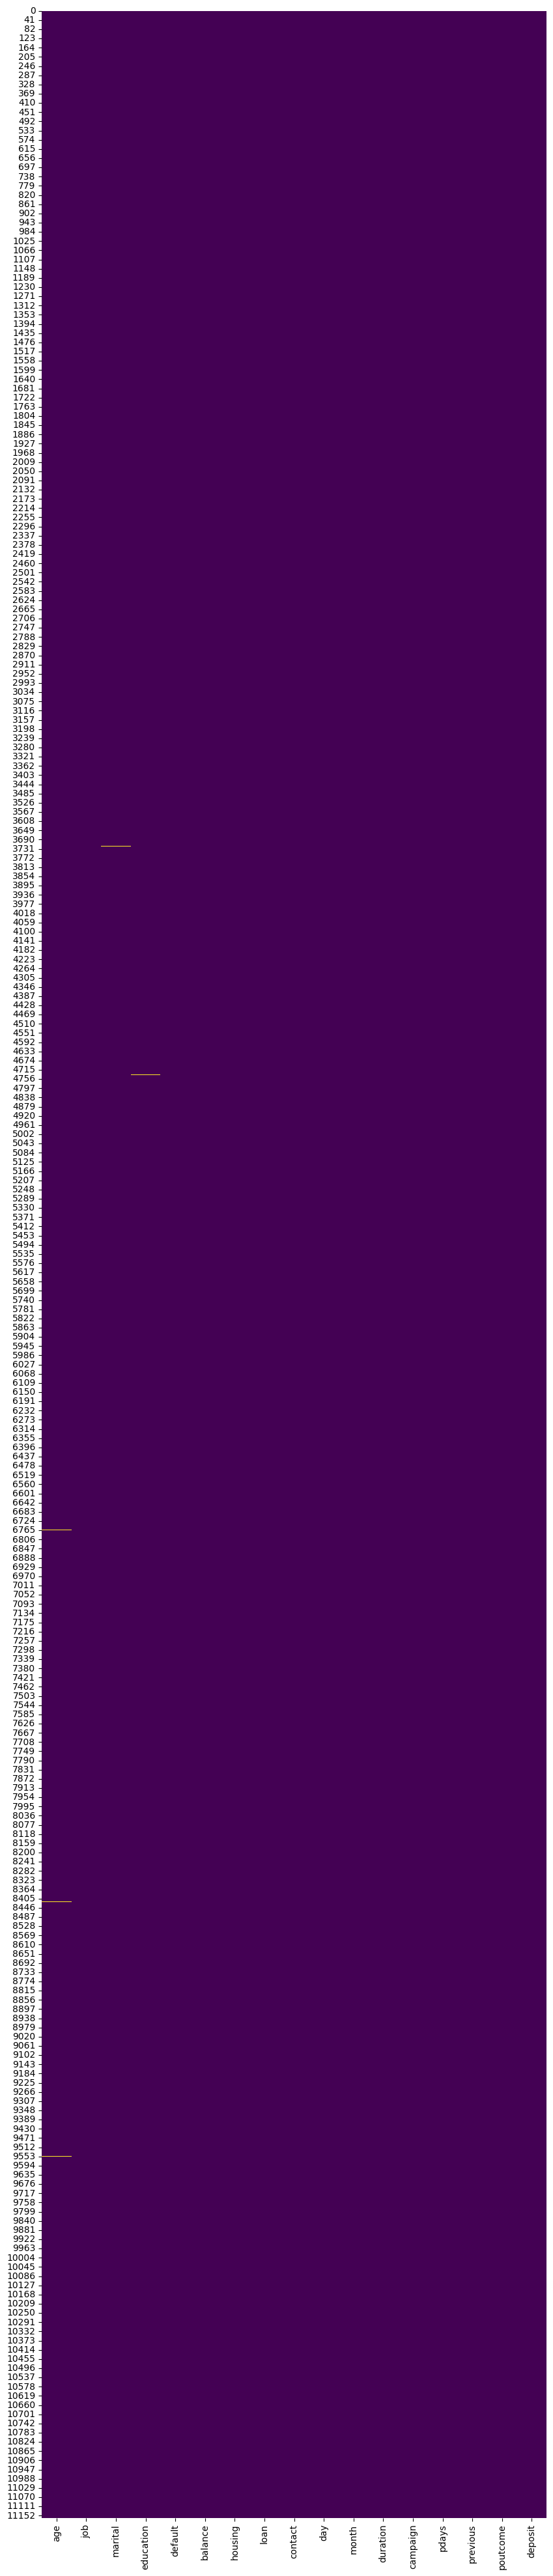

In [11]:
# Visualització de valors nuls
plt.figure(figsize=(10, 50))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


- La columna `age` no te una distribució normal de valors (veure histograma mes endavant):
    - Omplim els valors nuls amb la mediana, ja que en general es més representativa que la mitjana en distribucions que no son de tipus normal
    - Una altra possibilitat es fer blocs d'edats (p.e. <30, 30-45, 45-60, 60-75, >75) i distribuir els nuls uniformement entre les categories
- Per `education` i `marital` omplim amb un nou valor `unknown`. No trobem que tingui sentit omplir amb la moda
- En qualsevol cas, el número de nuls es molt baix respecte del total de registres i per tant no s'espera una gran influencia de la manera en que s'omplen els valors nuls
- Tot i que el número de registres amb valors es molt baix, no considerem eliminar-los ja que creiem que la influencia podria ser major que la de la substitució que hem proposat

In [12]:
mediana = df['age'].median()        # Calculem la mediana de la caracteristica 'age' 

df['age'].fillna(mediana, inplace=True)
df['education'].fillna('unknown', inplace=True)
df['marital'].fillna('unknown', inplace=True)

# NOTA: Al executar surt un 'FutureWarning' que aplicarà a la version 3.0 de Pandas (la versió amb la que treballem es la 2.2.3)

C:\Users\Manu\AppData\Local\Temp\ipykernel_12712\1286802026.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(mediana, inplace=True)
C:\Users\Manu\AppData\Local\Temp\ipykernel_12712\1286802026.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

- Verifiquem que ara no hi ha nuls
- Recalculem les estadistiques i verifiquem que no hi canvis significatius

In [13]:
# Valors faltans (NaN)
df.isnull().sum().sort_values(ascending=False)


age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
deposit      0
dtype: int64

- La mitjana pasa de 41.24 a 41.23. La resta d'estadistiques resten igual

In [ ]:
basic_stats(df)

# NOTA: Només canvia la mitjana, que pasa de 41.24 a 41.23. La resta d'estadistiques resten igual.

'age': 
  Mínim: 18.0, Màxim: 95.0
  Mitjana: 41.23, Mediana: 39.00, Desviació Estàndard: 11.91
  Moda: 31.0 (496 de 11162)
'education':
  Moda: 'secondary' (5474 de 11162)
'marital':
  Moda: 'married' (6349 de 11162)


### Detecció de registres duplicats.

- Utilitzem el mètode `.duplicated()` per confirmar que no hi ha registres duplicats que podrien esbiaxar el model de ML. 

In [15]:
# Busca registres duplicats 
df.duplicated().any()

False

### Histogrames de les variables numériques

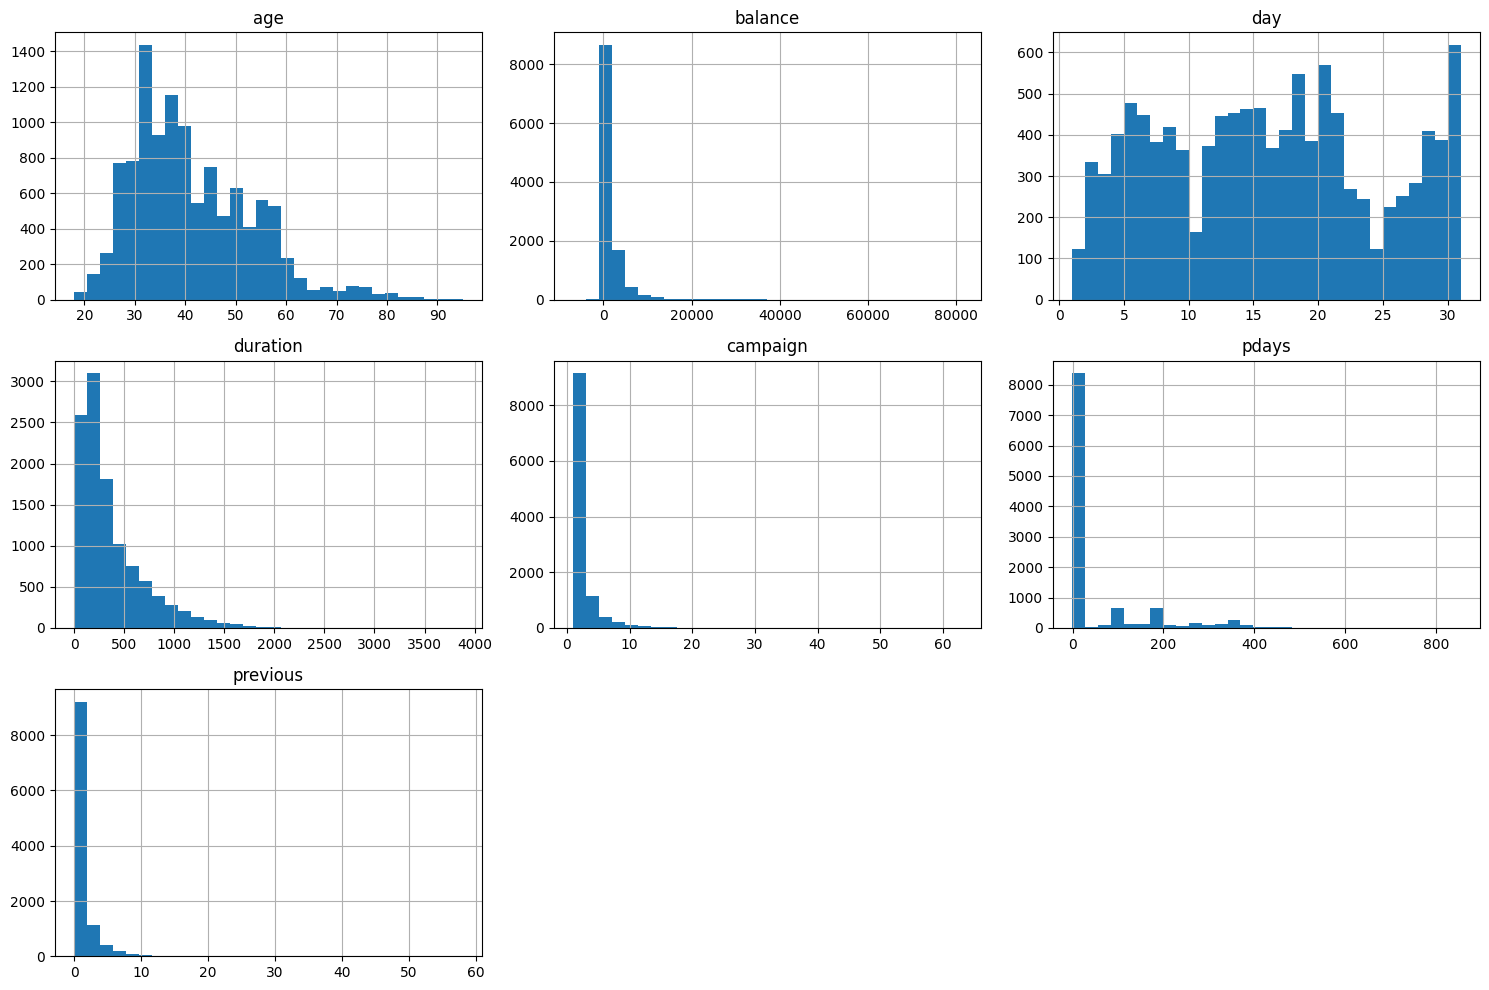

In [16]:
# Histogrames de les variables numériques
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

### Matriu de correlació de columnes numèriques
- No es veuen fortes correlacions entre les caracteristiques numèriques
- Aixo significa que aporten informació diferent i no hi ha redundància 

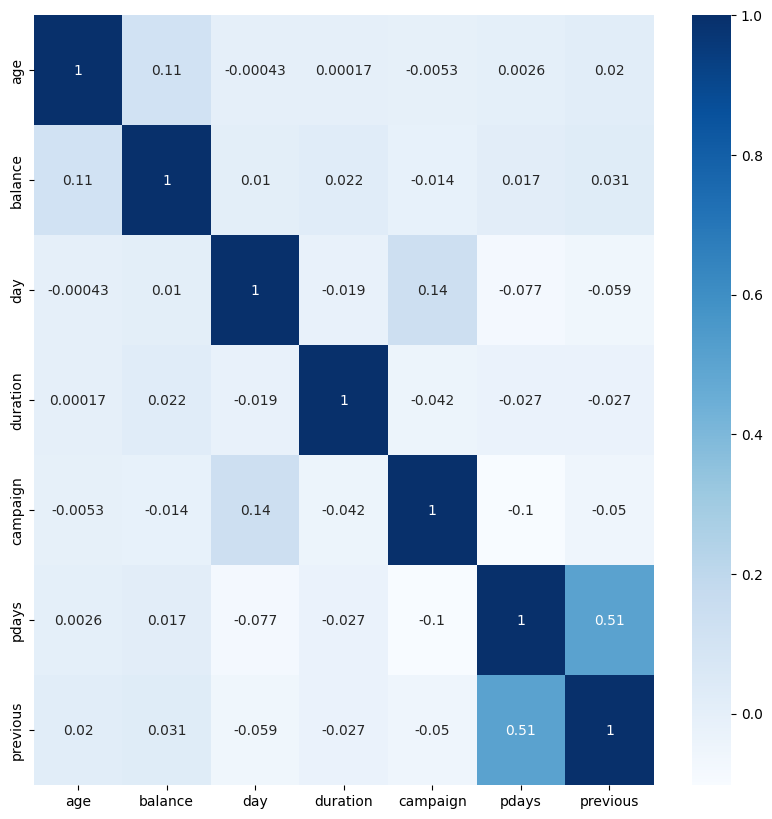

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=df.corr(numeric_only=True), cmap='Blues', annot=True)
plt.show()

### Distribució de les variables categòriques
- Aquests gràfics ens ajuda a veure de forma gràfica quans valores diferents i en quina quantitat te cada característica categòrica
- Sobre tot es important per detectar desbalanceig en el 'target'

In [ ]:
# Característiques categòriques 
df.columns[df.dtypes == 'object']

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

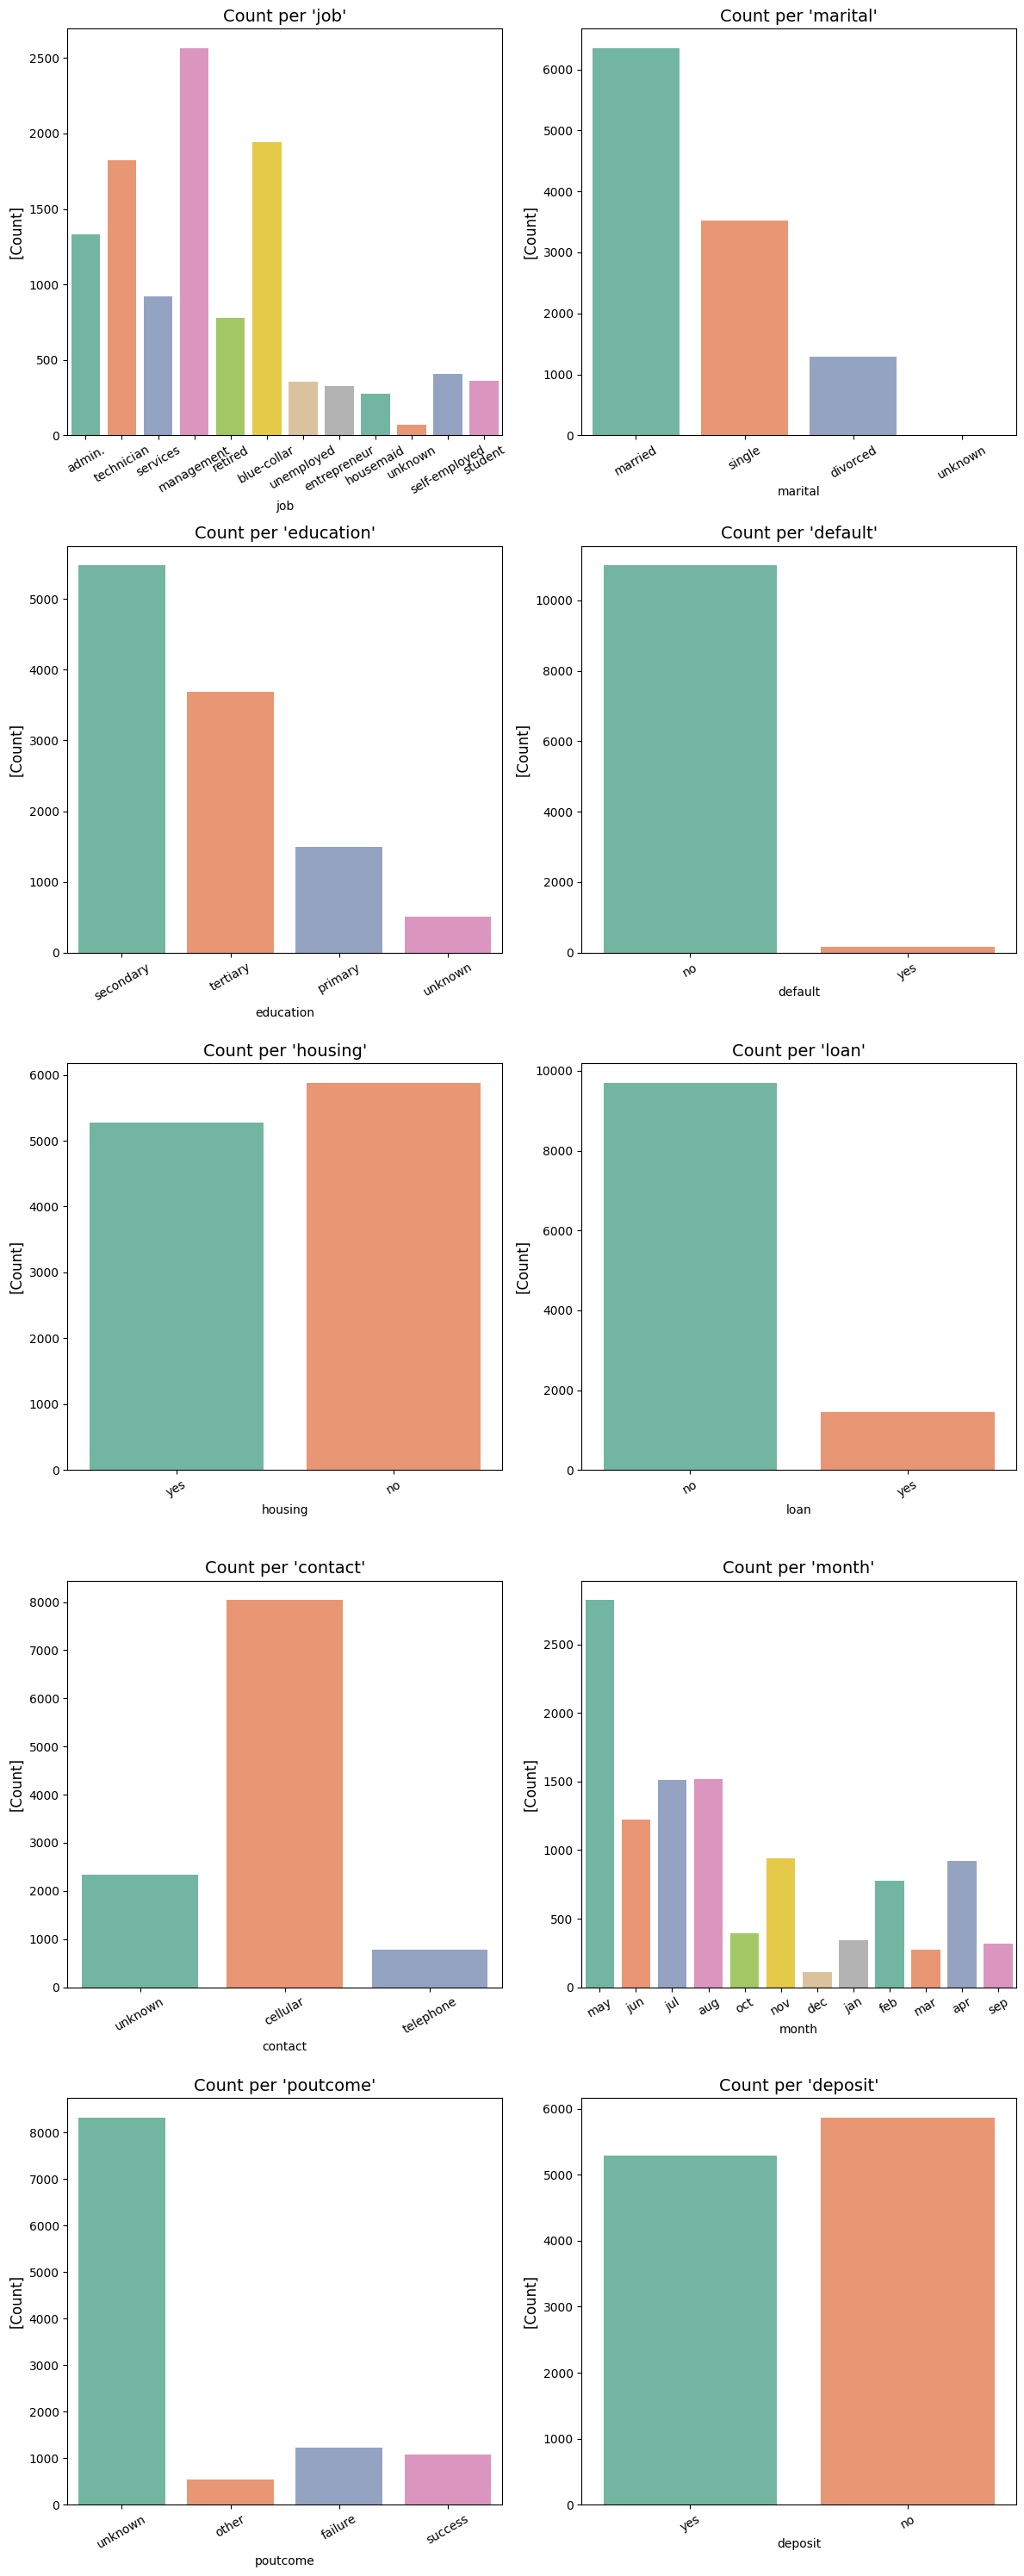

In [ ]:
# Visualització de les distribucions de valores de les característiques categòriques
# Amb aquest gràfic veiem ens fem una idea de quants valors hi ha per cada caracteristica

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 30))            # Dibuixem 10 característiques en 5 files per 2 columnes
col_cat = df.columns[df.dtypes == "object"]                 # Llistat de caracteristiques

for i, col in enumerate(col_cat):
    x, y = divmod(i, 2)                                     # Calcula posició relativa del gràfic 
    sns.countplot(x=df[col], ax=axes[x, y], 
                  hue=df[col], palette='Set2')

    axes[x, y].set_title(f"Count per '{col}'", fontsize=14)
    # axes[x, y].set_xlabel(col, fontsize=12)
    axes[x, y].set_ylabel("[Count]", fontsize=12)
    axes[x, y].tick_params(axis='x', rotation=30)
    
plt.tight_layout()
plt.show()

### Visualització del ratio de 'yes' del target ('deposit') per cada valor de cada característica categòrica
- Amb aquest gràfic podem veure un si determinat grup de una categoria té mes o menys tendència a contractar un deposit
- Juntament amb el gràfic `.countplot()`  ens permet tenir una primera estimació de quines són les variables mes importants. Per exemple, veiem que més del 70% de `student` ha contractat el deposit, però el percentatge de clients tipus `student`es baix (meny del 5%). En canvi, `management` te al voltant del 50% de contractació del deposit i també té un pes important dintre de la cartera de clients (prop del 25%).

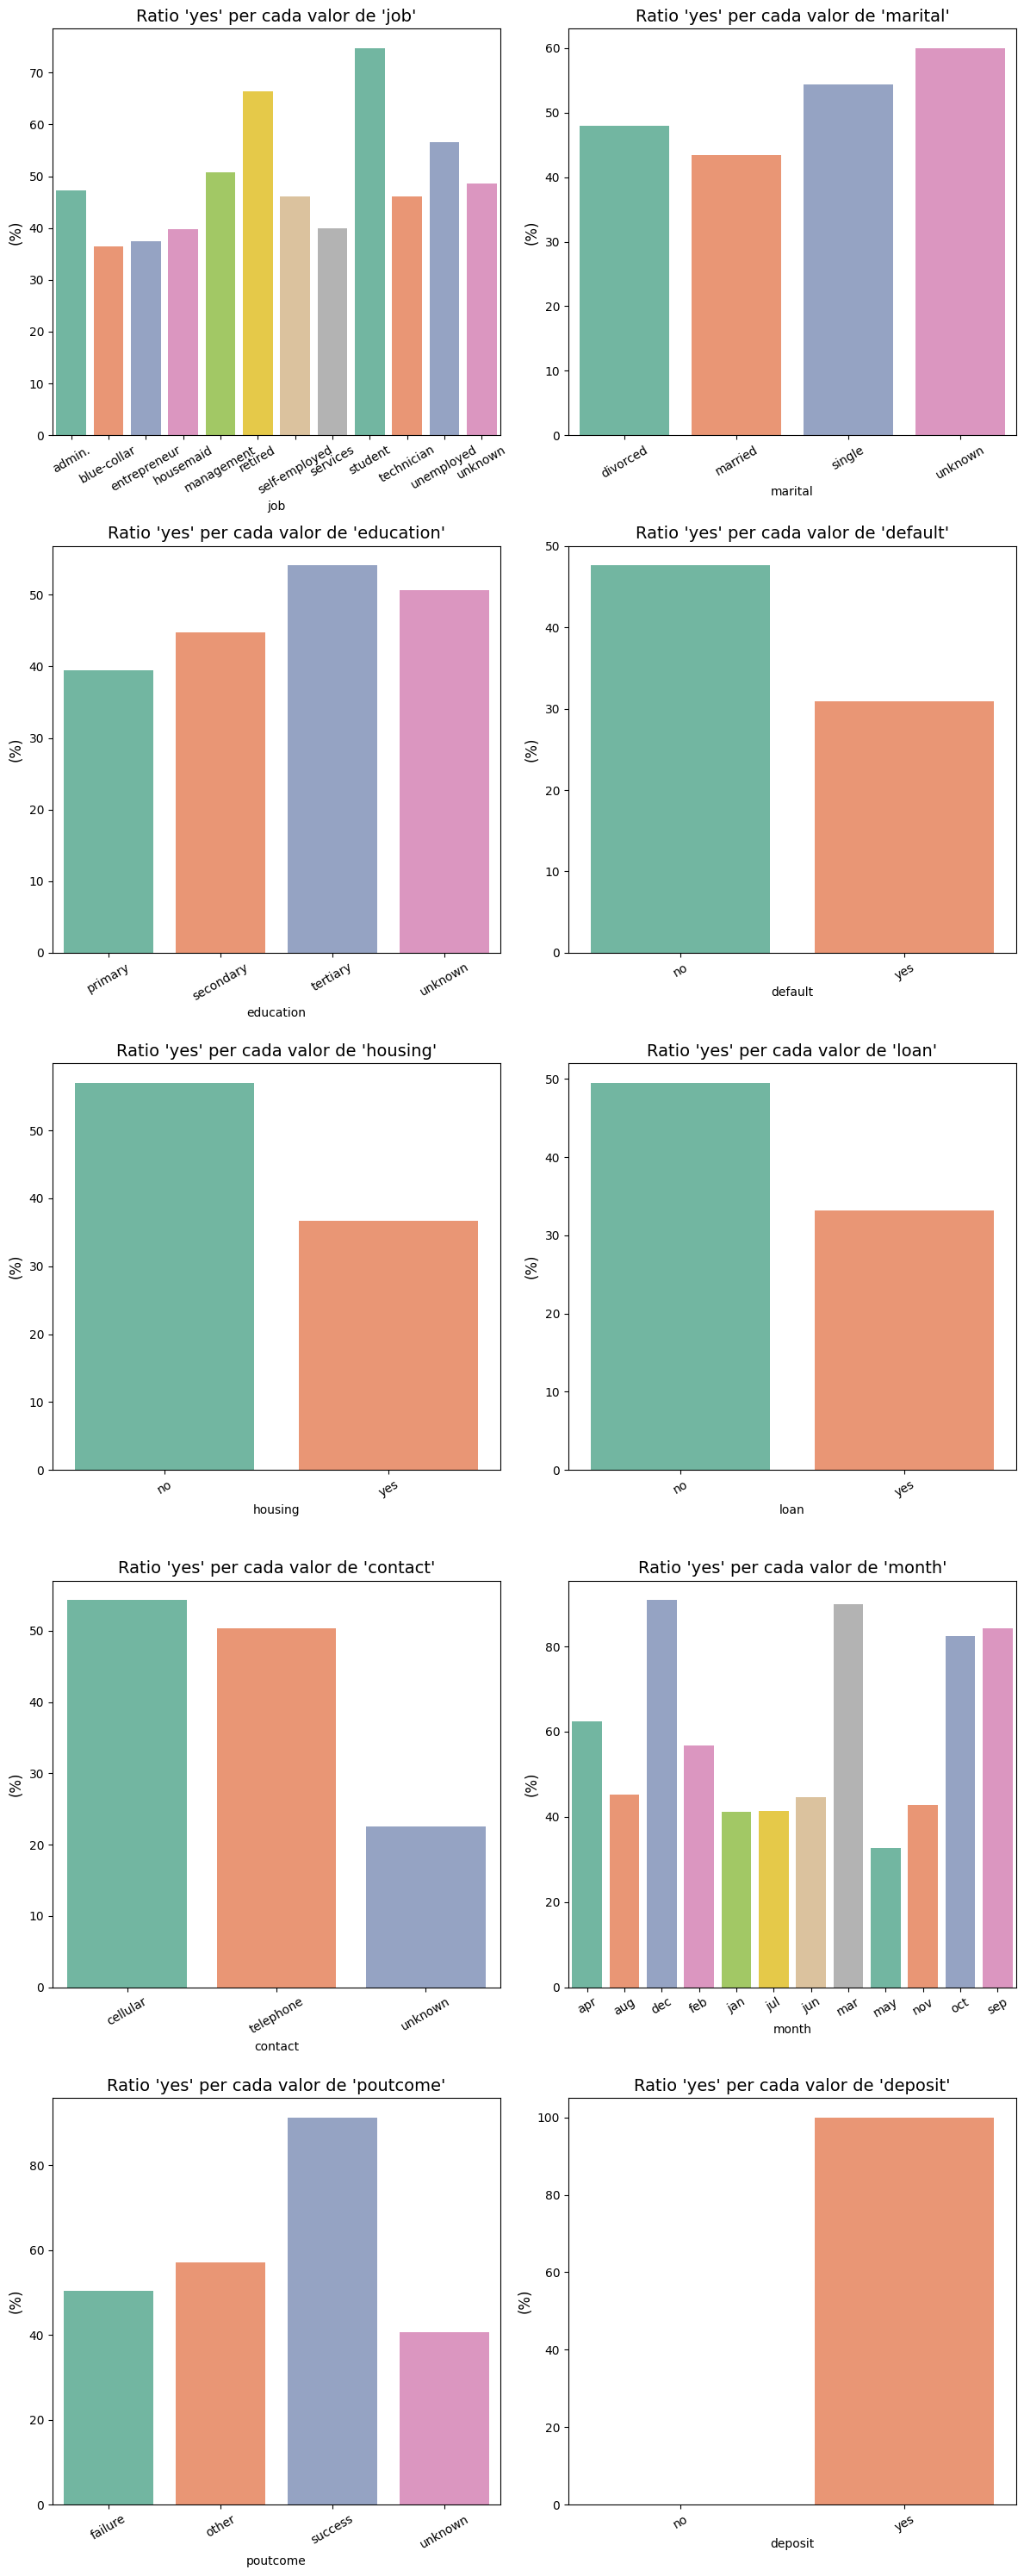

In [ ]:
# Visualització del percentatje de 'yes' del target ('deposit') per cada valor de cada característica categòrica

fig, axes = plt.subplots(5, 2, figsize=(12, 30))            # Dibuixem 10 característiques en 5 files per 2 columnes
col_cat = list(df.columns[df.dtypes == "object"])           # Llistat de característiques

for i, col in enumerate(col_cat):
    total_counts = df[col].value_counts()                                   # Totals de valors per caracteristica
    yes_counts = df[df["deposit"] == "yes"][col].value_counts()             # Totals 'yes' per caracteristica
    ratios = (100 * yes_counts / total_counts).sort_index()                 # Percentatges de 'yes' per cada valor 
    ratios.fillna(0, inplace=True)                                          # Evita errors amb els NaN
    
    x, y = divmod(i, 2)                                                     # Calcula posició relativa del gràfic 
    sns.barplot(x=ratios.index, y=ratios.values, 
                ax=axes[x, y], hue=ratios.index, palette="Set2")
    
    axes[x, y].set_title(f"Ratio 'yes' per cada valor de '{col}'", 
                         fontsize=14)
    # axes[x, y].set_xlabel(col, fontsize=12)
    axes[x, y].set_ylabel("(%)", fontsize=12)
    axes[x, y].tick_params(axis="x", rotation=30)

plt.tight_layout()
plt.show()

### Gràfics de distribució de cada característica respecte del target "deposit"
- Distribució del valors de les caracteristiques categoriques respecte de cada valor del target "deposit"
- Similar a la matriu de correlación que hem dibuixat abans però amb les características categòriques


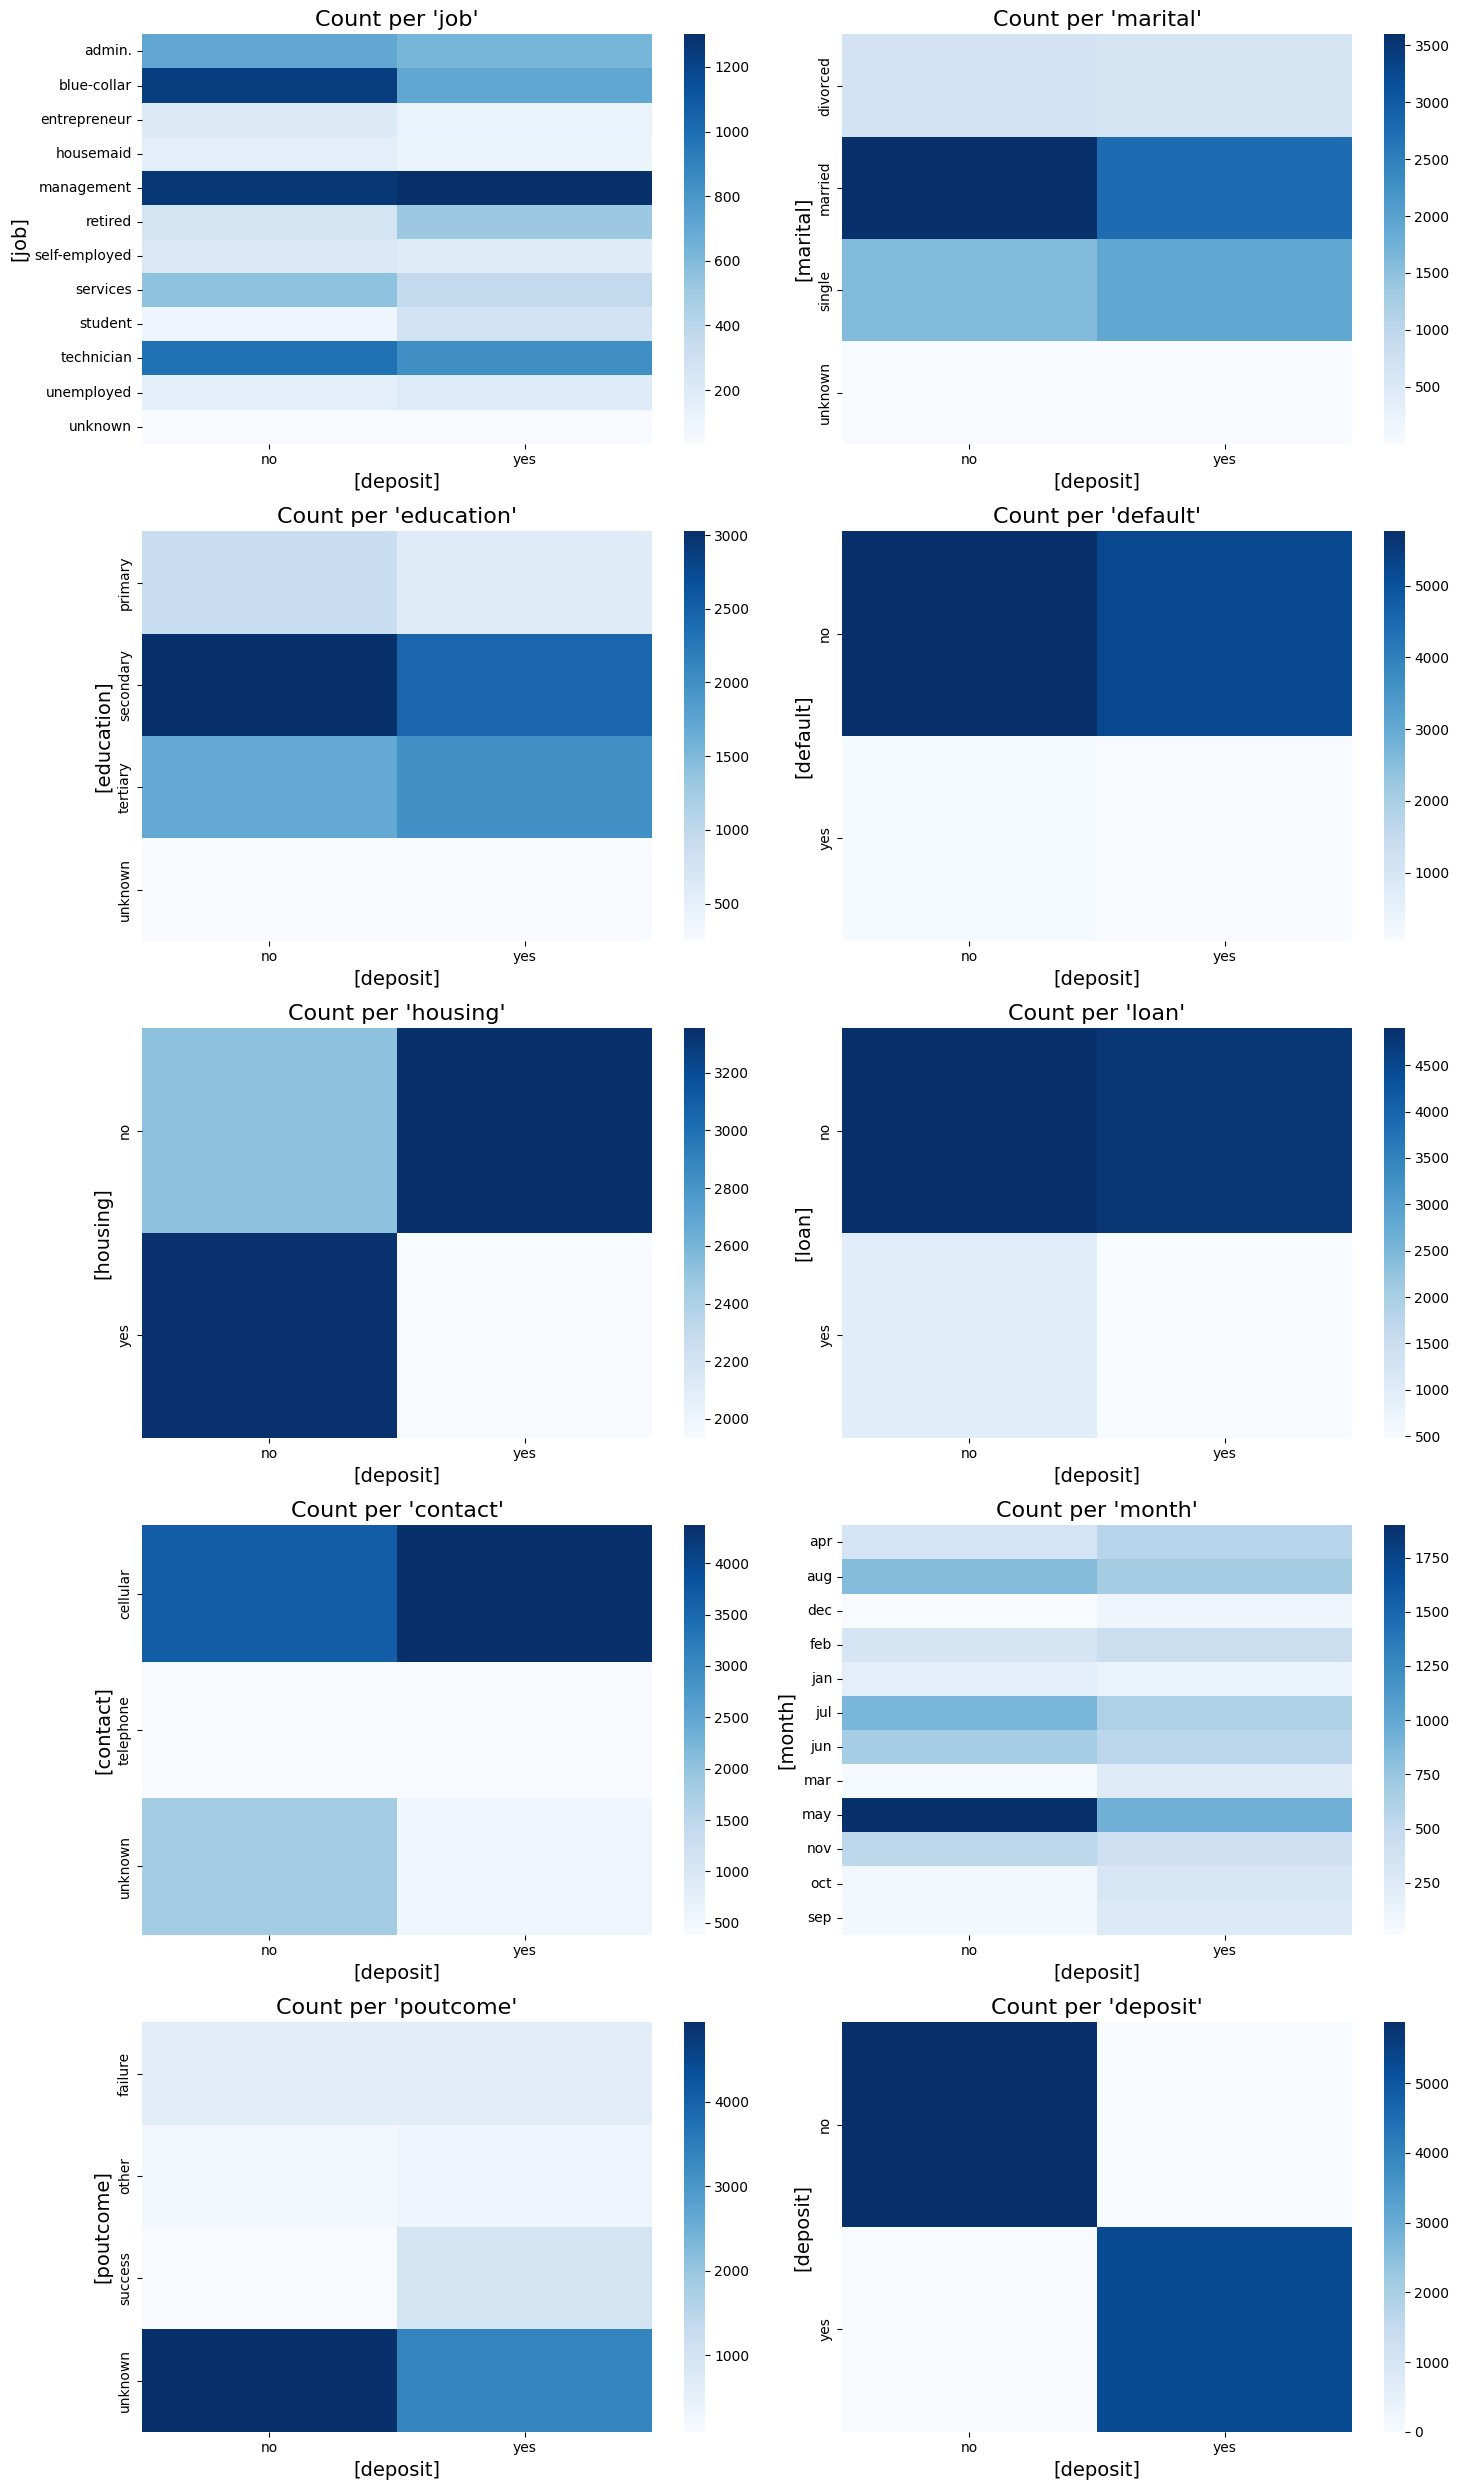

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))    # Dibuixem 16 característiques en 8 files per 2 columnes
col_cat = df.columns[df.dtypes == "object"]
# col_cat = df.columns.drop("deposit")                              # Caracteristicas vs. target

for i, col in enumerate(col_cat):
    x, y = divmod(i, 2)                                     # Calcula posició relativa del gràfic 

    sns.heatmap(pd.crosstab(df[col], df["deposit"]), ax=axes[x, y], cmap="Blues")
    
    axes[x, y].set_title(f"Count per '{col}'", fontsize=16)
    axes[x, y].set_xlabel("[deposit]", fontsize=14)
    axes[x, y].set_ylabel(f"[{col}]", fontsize=14)
    # axes[x, y].tick_params(axis='y', rotation=30)

plt.tight_layout()
plt.show()

### Gràfics **BoxPlot** i **ViolinPlot** de cada caracteristica respecte del target `deposit`
- Gràfics amb els quartils, la mediana, la distribució i els outliers
- Gràfics separats per cada valor de "deposit" per veure possibles patrons per concentració de valors.
- El BoxPlot permet veure els outliers mentre que el ViolinPlot presenta les distribucions de valors amb l'ample de la gràfica.

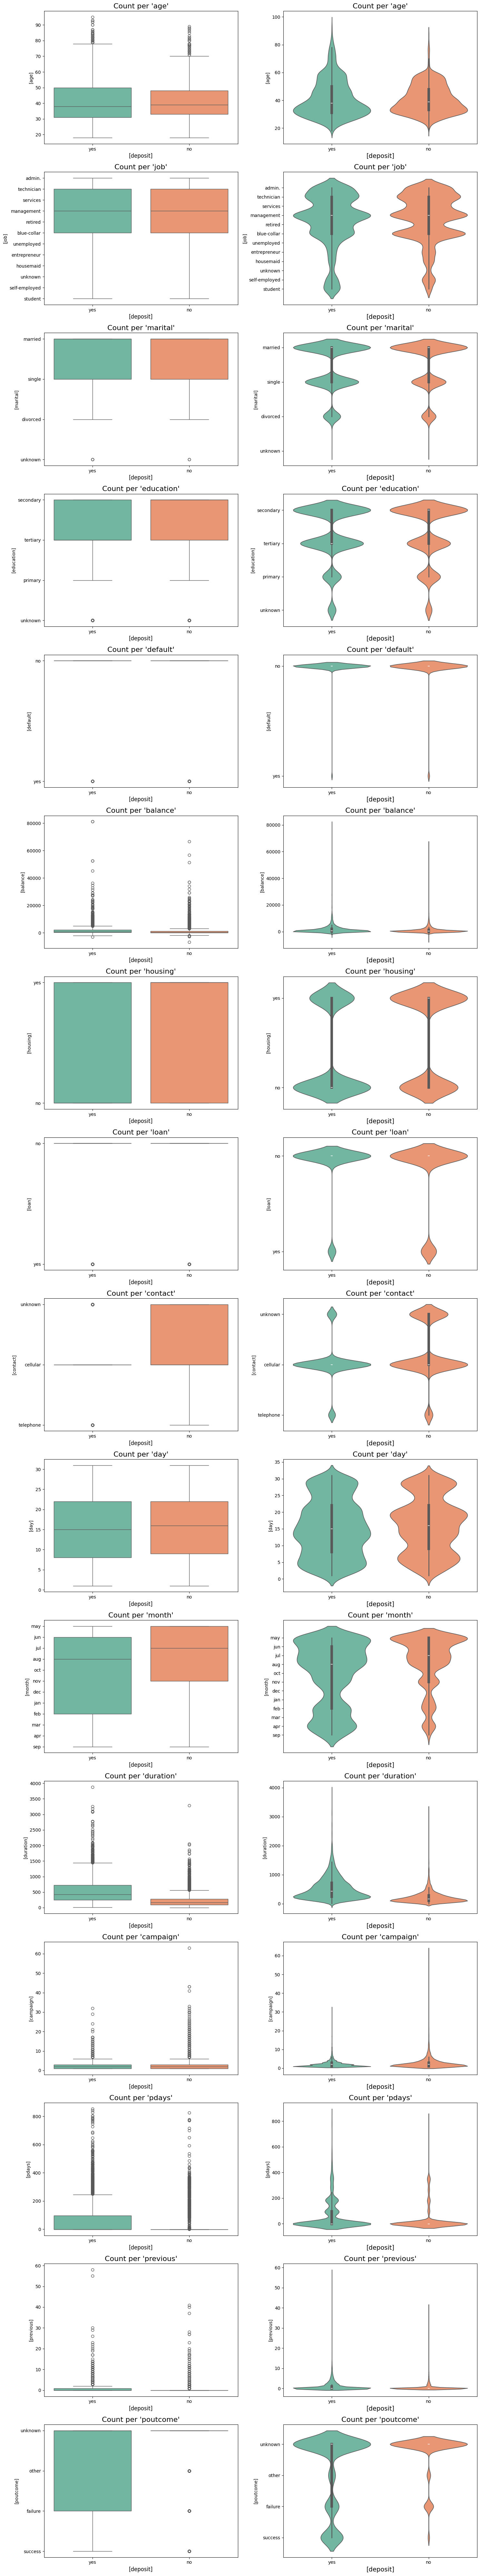

In [202]:
fig, axes = plt.subplots(nrows=16, ncols=2, figsize=(15, 80))            # Dibuixem 10 característiques en 5 files per 2 columnes
col_cat = df.columns.drop("deposit")

for i, col in enumerate(col_cat):

    x, y = (i, 0)
    sns.boxplot(y=col, x="deposit", data=df, ax=axes[x, y], palette="Set2", hue="deposit")
    axes[x, y].set_title(f"Count per '{col}'", fontsize=16)
    axes[x, y].set_xlabel("[deposit]", fontsize=12)
    axes[x, y].set_ylabel(f"[{col}]", fontsize=10)
    # axes[x, y].tick_params(axis='y', rotation=30)

    x, y = (i, 1)
    sns.violinplot(y=col, x="deposit", data=df, ax=axes[x, y], palette="Set2", hue="deposit")
    axes[x, y].set_title(f"Count per '{col}'", fontsize=16)
    axes[x, y].set_xlabel("[deposit]", fontsize=14)
    axes[x, y].set_ylabel(f"[{col}]", fontsize=10)
    # axes[x, y].tick_params(axis='y', rotation=30)
 
plt.tight_layout()
plt.show()

In [284]:
df.describe().T

count         mean          std     min    25%    50%      75%  \
age       11162.0    41.233381    11.909783    18.0   32.0   39.0    49.00   
balance   11162.0  1528.538524  3225.413326 -6847.0  122.0  550.0  1708.00   
day       11162.0    15.658036     8.420740     1.0    8.0   15.0    22.00   
duration  11162.0   371.993818   347.128386     2.0  138.0  255.0   496.00   
campaign  11162.0     2.508421     2.722077     1.0    1.0    2.0     3.00   
pdays     11162.0    51.330407   108.758282    -1.0   -1.0   -1.0    20.75   
previous  11162.0     0.832557     2.292007     0.0    0.0    0.0     1.00   

              max  
age          95.0  
balance   81204.0  
day          31.0  
duration   3881.0  
campaign     63.0  
pdays       854.0  
previous     58.0

### Gestió de **Outliers** i selecció de **Variables**  

- `age`: El gràfic ens marca como outliers els valors per sobre de 74 anys aproximadament. L'histograma d'aquesta variable ens diu que la distribució es compatible amb la distribució de edats del món real. Per tant ho deixem sense canvis per tal de que el model pogui trobar possibles patrons de comportament per totes les edats. No hi ha edats irreals.

- `job`, `marital` i `education` els deixem sense canvis. No tenim prou informació per tal de deduir els valors 'unknown' que apareixen (potser es podria relacionar `job` amb `educació` pero no és gaire clar). En fases posteriors del projecte s'hauran de convertir en valors numerics.

- `default`. No hi outliers, simplement reflecteix el món real en que una minoria de clients no està en default. Es queda igual.

- `balance`. En aquest cas ens trobem que la gran majoria de dades son outliers. L'histograma ens confirma que al voltant del 85% dels clients tenen un balanç baix i per tant baixa disponibilitat de diners per invertir en un deposit. Per eliminar outliers i reduir la granularitat, aquesta variable la convertim en binaria (balance=0, quan estigui per sota d'un cert llindar i balance=1 quan sigui superior a un cert llindar). El llindar serà el valor del quartil 75% (1.708 euros). La idea es que un client amb un balanç '0' es mes improbable que contrati un deposit, però no imposible perquè podria tenir altres entitats bancaries o altres inversions. Un client amb balance '1' tindrà mes liquiditat per contractar el deposit.

- `housing`, `loan`. Variables binaries que donen informació de crèdits que té el client. Es deixen sense canvis.

- `contact`, No hi ha outliers però si que hi ha valors desconeguts, que no podem deduir de cap manera. La majoria de contactes són per `cellular` i pocs per `telephone`. Hem pensat que els contactes per `telephone` estarien concentrades a les persones de mes edat, però hem comprovat que no es aixi. La deixem sense canvis.

- `day`, `month`. No hi outliers ni valors desconeguts. Les deixem sense canvis.

- `duration`. S'ha d'eliminar ja que quan finalitza la trucada ja saben si s'ha contractat o no el deposit. Dit d'altra manera, en el futur no podrem disposar d'aquesta variable per predir el target. 

- `campaign`. La distribució es molt asimètrica (veure gràfics) i de fet el 75% del clients s'han contactat 3 o menys cops, mentre que el màxim es de 63 dies. Per altra banda, quan el número de contactes es petit, te sentit tornar a contactar però la diferencia entre contactar 40 o 41 cops no es significativa. Així doncs, aquesta variable la convertim en 3 valors tenim en compte els quartils 75% i 95%, eliminant outliers i reduint granularitat de cara a l'entrenament del model
    - 0 --> 1 a 3 contactes (quartil 75%)
    - 1 --> 4 a 7 contactes (quartil 95%)
    - 2 --> 8+ contactes

- `pdays`. També es un variable molt asimètrica (aproximadament, un 80% de clients no s'han contactat en campanyes anteriors). Apliquem la mateixa tècnica amb els següents valors:
    - 0 --> No contactat (representar per -1)
    - 1 --> <= 21 dies des de l'últim contacte de la campanya anterior (quartil 75%)
    - 2 --> 21+ dies

- `previous`. Igual que les dues variables anteriors, apliquem una transformació del mateix estil:
    - 0 --> No contactat abans d'aquesta campanya 
    - 1 --> 1 contacte abans d'aquesta campanya (quartil 75%)
    - 2 --> 2 - 5 contactes (quartil 95%)
    - 3 --> 5+

- `poutcome`. Tot i que es un variable important (éxit de l'última campaña) al voltant del 80% no conté información. Canviem el valor 'other' per 'unknown' ja que no te sentit dos valors diferents que donen la mateixa informació.

- `deposit`. Target a predir pel model ML. No te outliers ni valors desconeguts. Ja hem comentat abans que està balancejat.

In [287]:
# Apliquem les transformacións anteriorment esmentades sobre una copia del dataframe

# Treballem sobre una copia del dataset original
df_eda = df.copy()      

# Variable "balance"
q75 = df["balance"].quantile(0.75)
df_eda["balance"] = df["balance"].apply(
    lambda x: 0 if x <= q75 else 1)

# Variable "campaign"
q75 = df["campaign"].quantile(0.75)
q95 = df["campaign"].quantile(0.95)
df_eda["campaign"] = df["campaign"].apply(
    lambda x: 0 if x <= q75 else (1 if x <= q95 else 2))

# Variable "pdays"
q75 = df["pdays"].quantile(0.75)
df_eda["pdays"] = df["pdays"].apply(
    lambda x: 0 if x == -1 else (1 if x <= q75 else 2))

# Variable "previous"
q75 = df["previous"].quantile(0.75)
q95 = df["previous"].quantile(0.95)
df_eda["previous"] = df["previous"].apply(
    lambda x: 0 if x == 0 else (1 if x <= q75 else (2 if x <= q95 else 3)))

# Variable "poutcome"
df_eda["poutcome"] = df["poutcome"].replace({"other" : "unknown"})

# Variable "duration"
df_eda.drop("duration", axis=1, inplace=True)

# Desem el nou dataset per la següent fase
DATASETFILE = "../Data/bank_dataset_eda.csv"
df_eda.to_csv(DATASETFILE)

### Analisis automatico con la libreria 'sweetviz'


In [ ]:
%pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import sweetviz as sv

report_sv = sv.analyze(df, target_feat='deposit')
report_sv.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



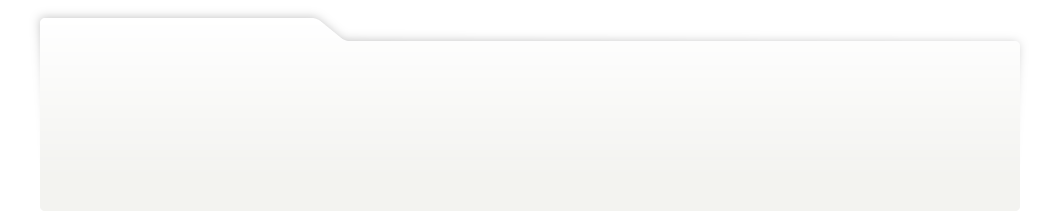
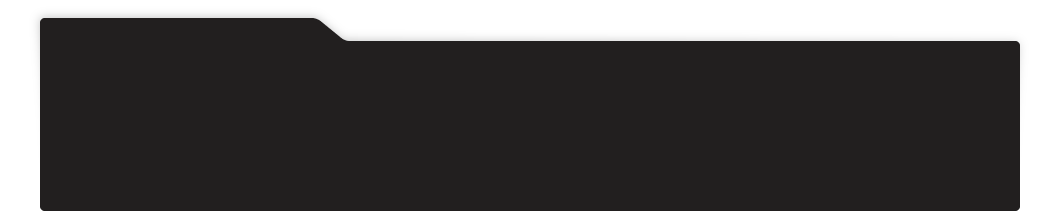
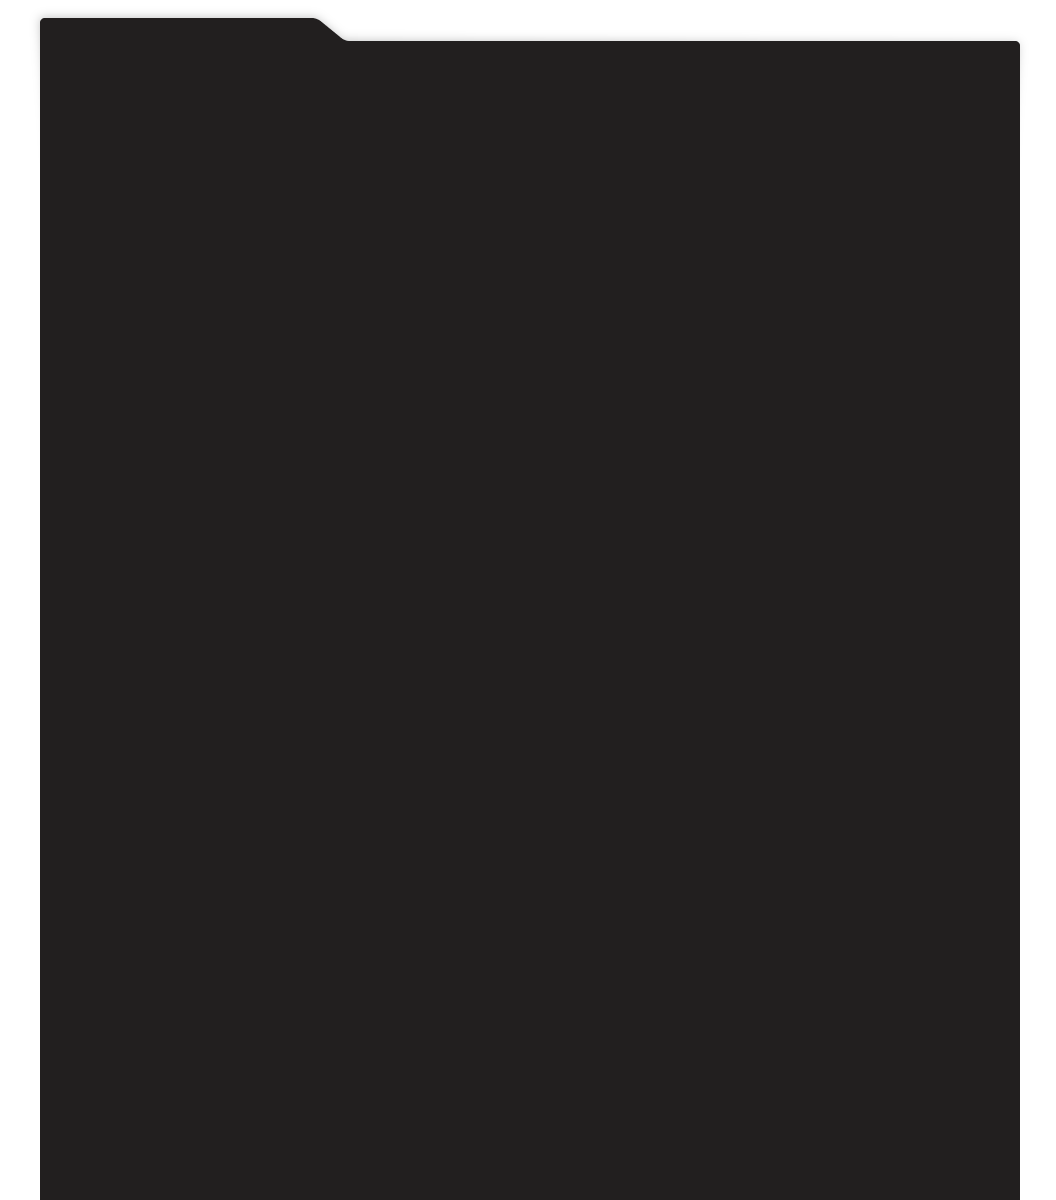
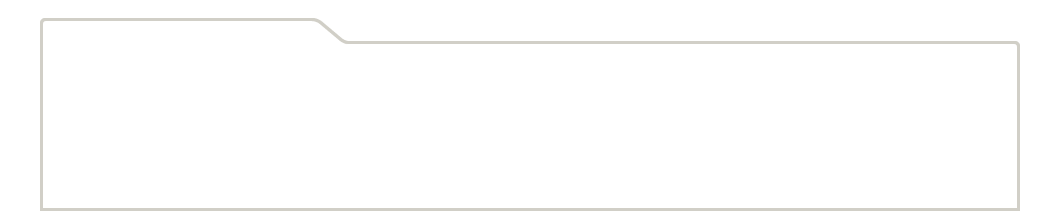
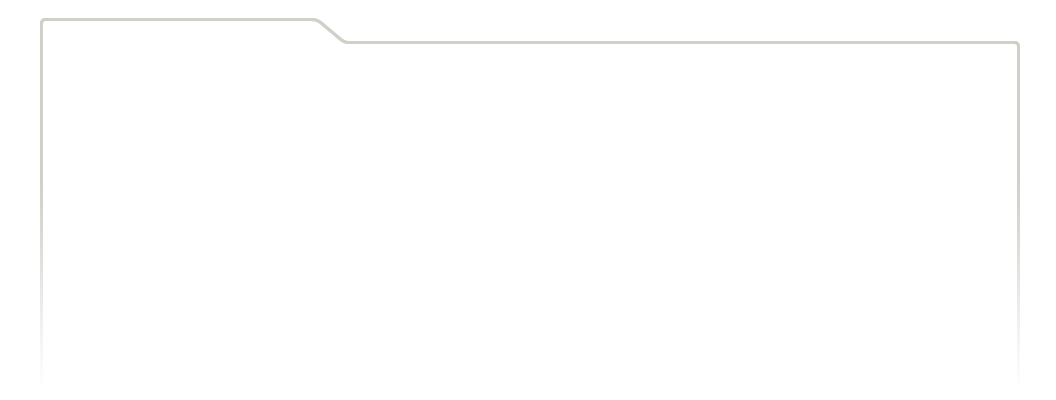
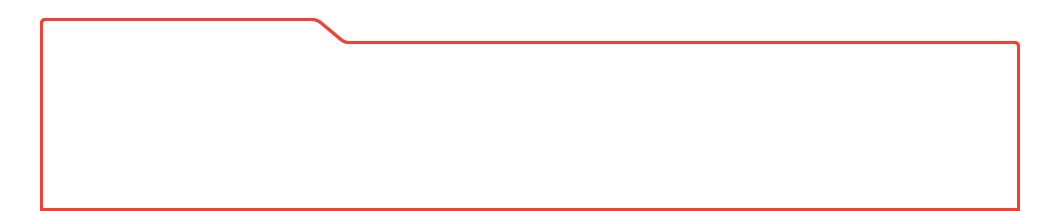
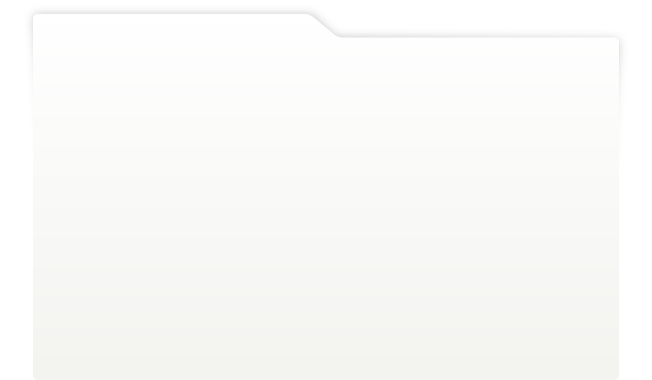
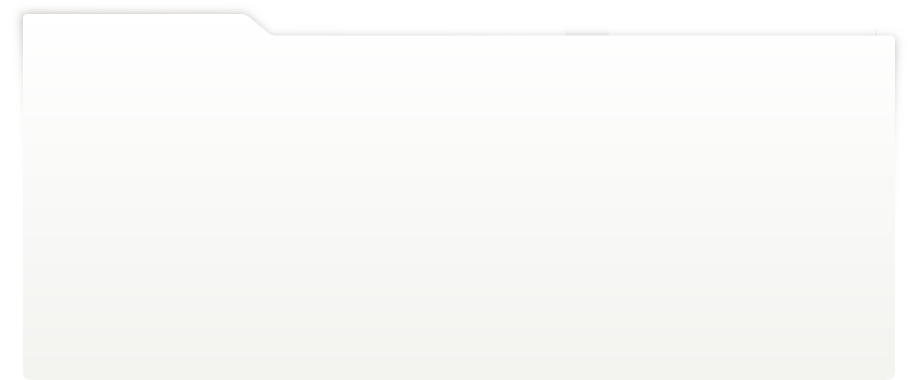
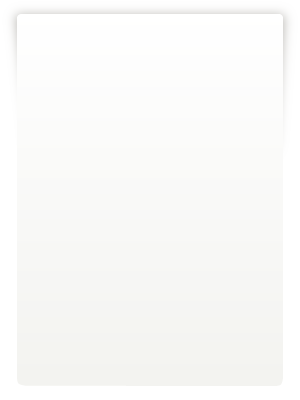
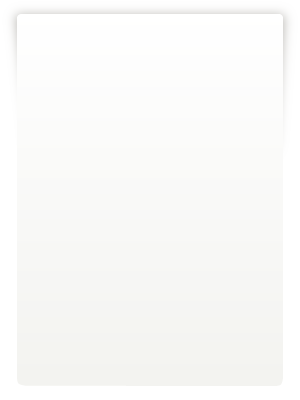
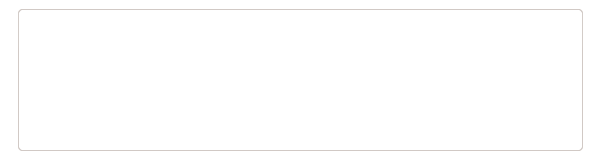
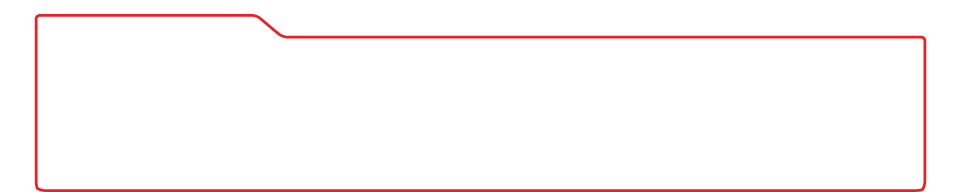
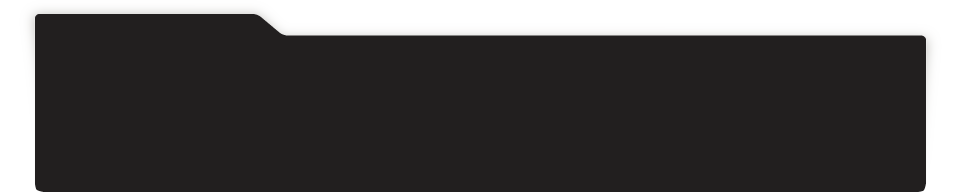
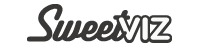
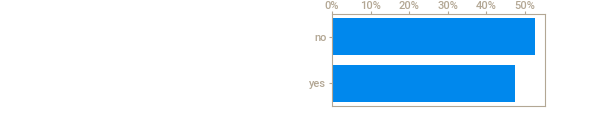
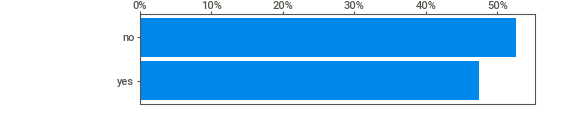
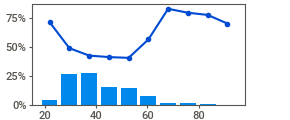
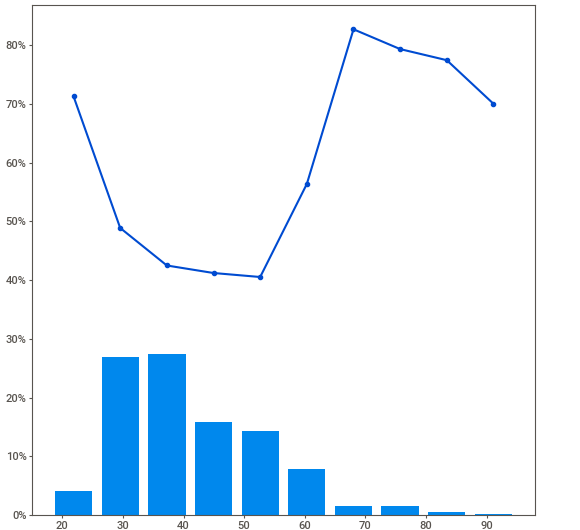
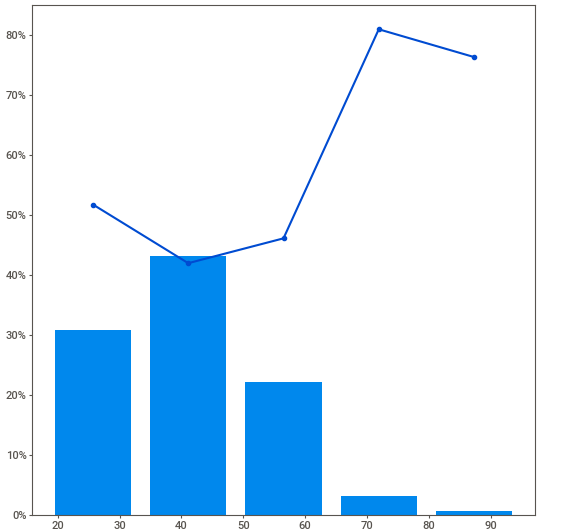
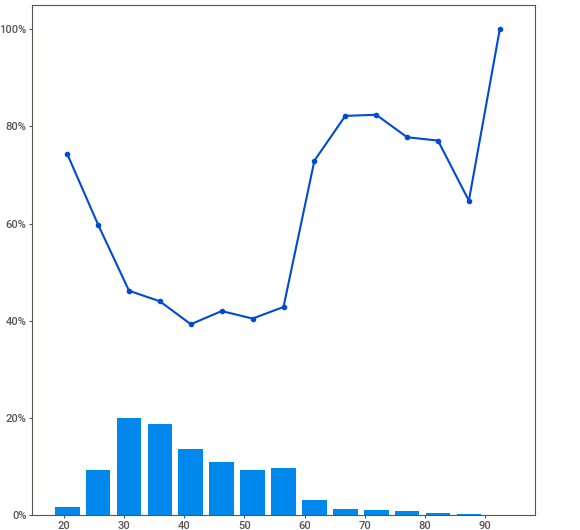
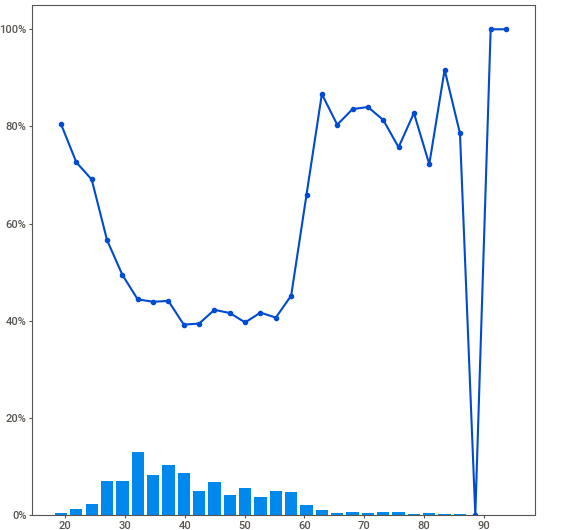
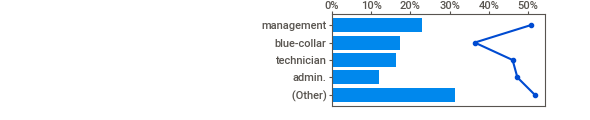
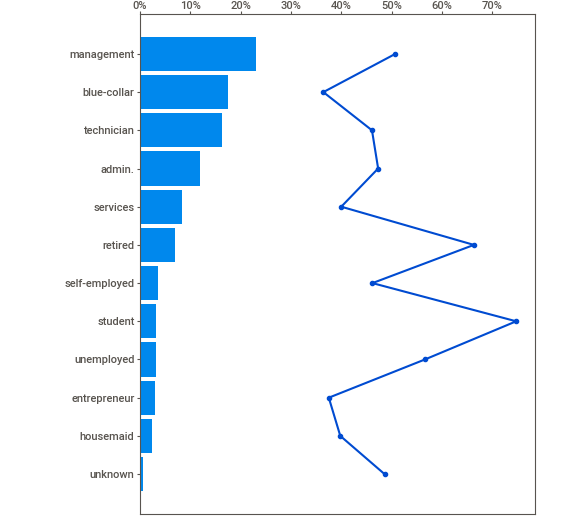
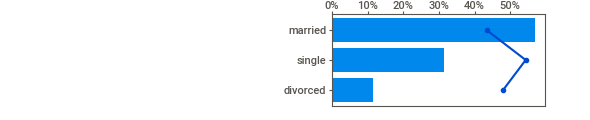
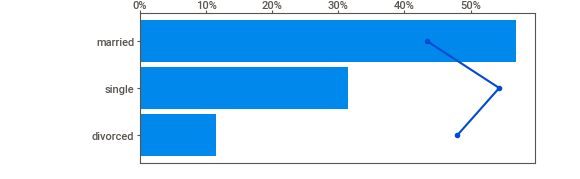
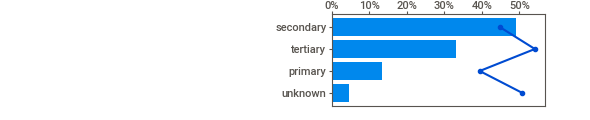
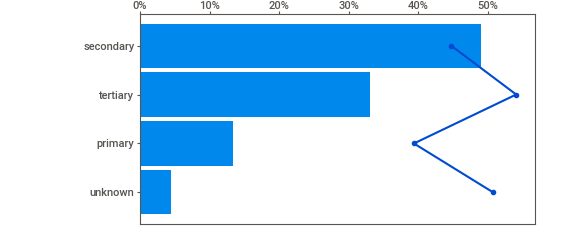
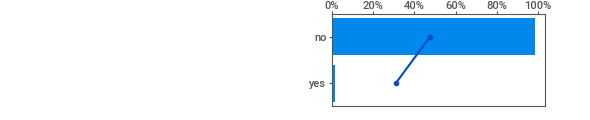
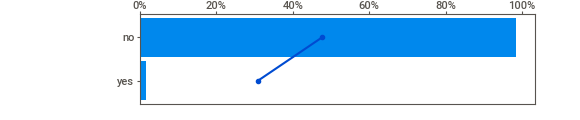
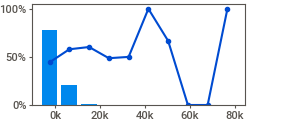
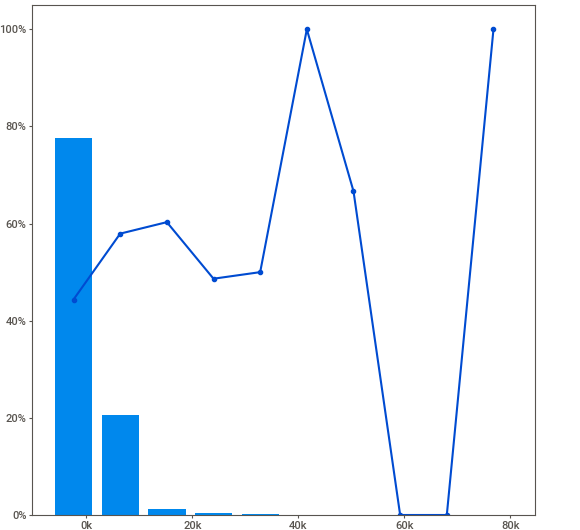
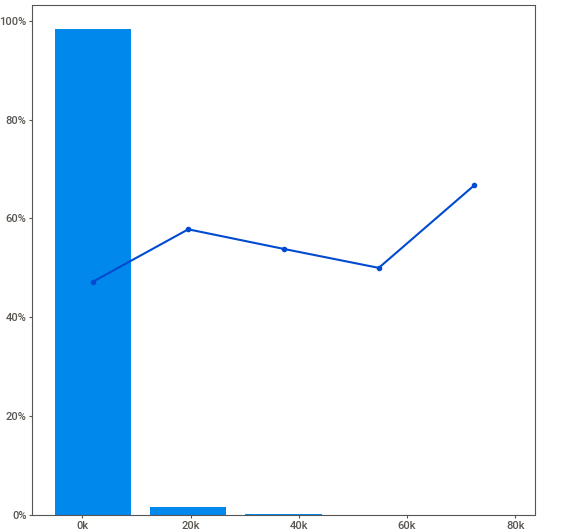
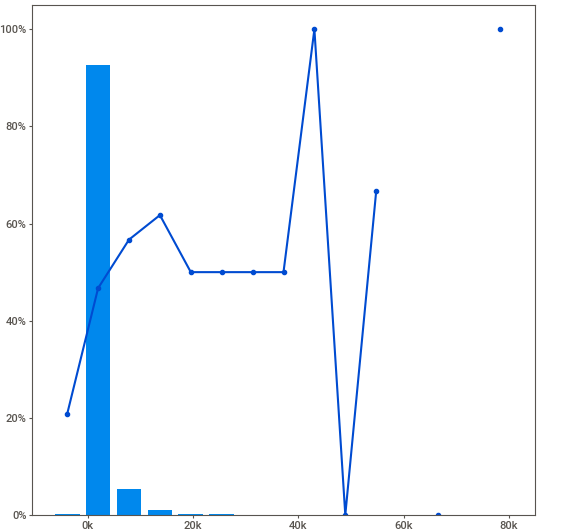
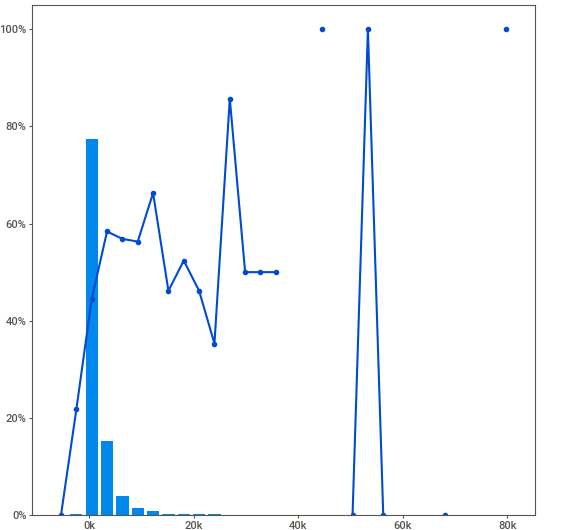
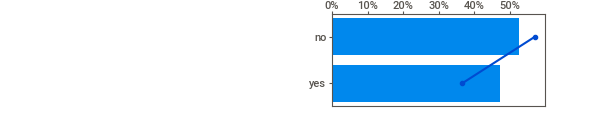
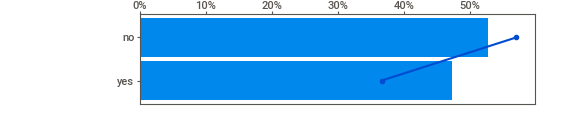
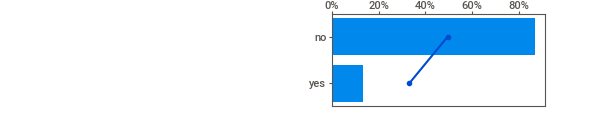
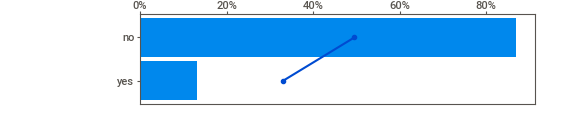
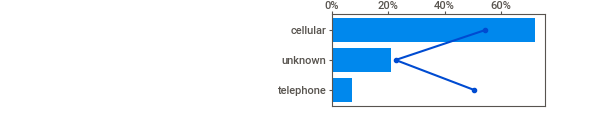
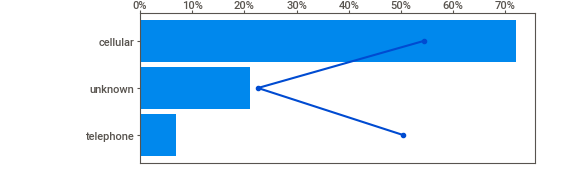
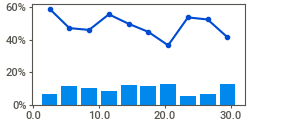
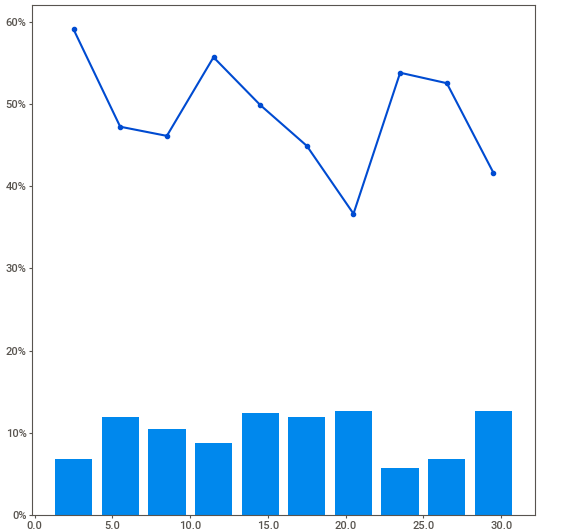
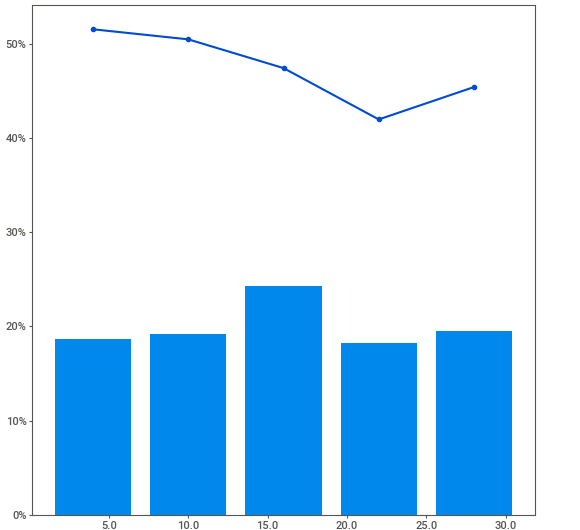
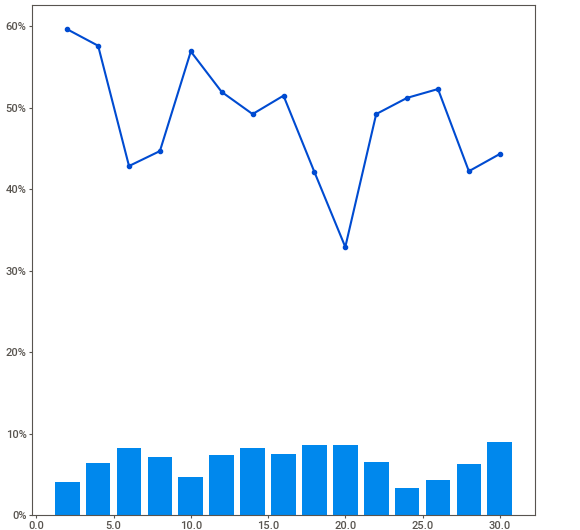
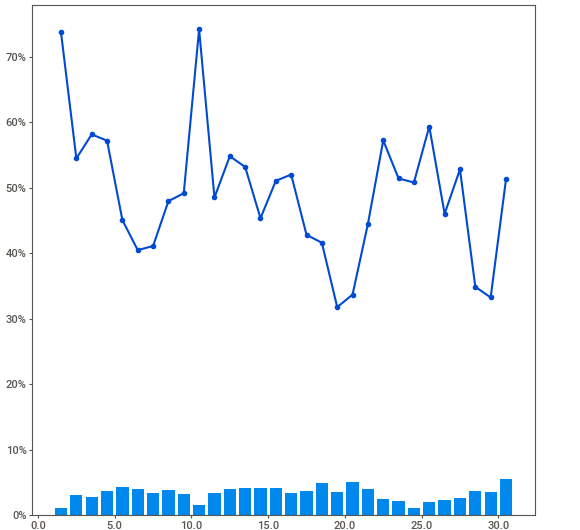
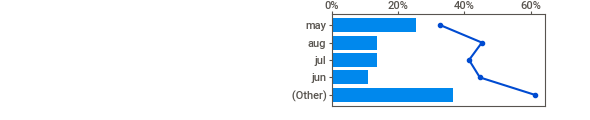
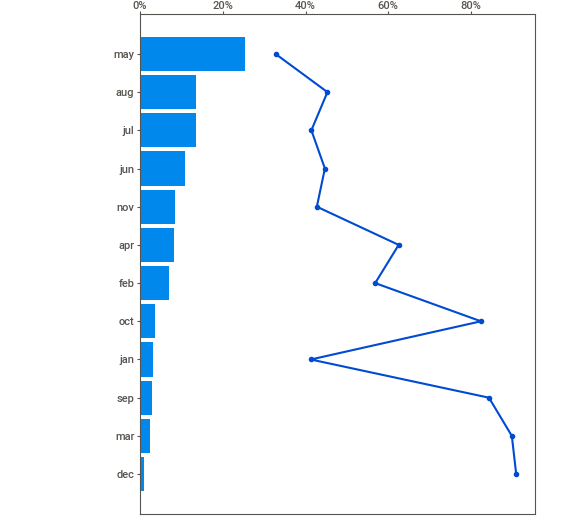
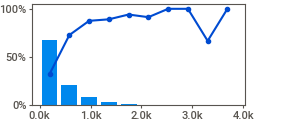
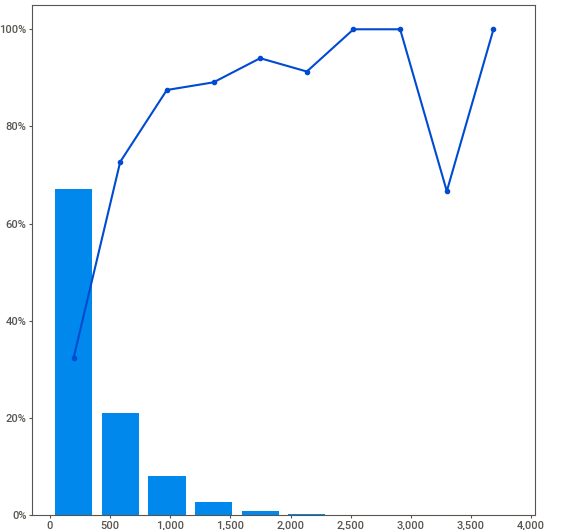
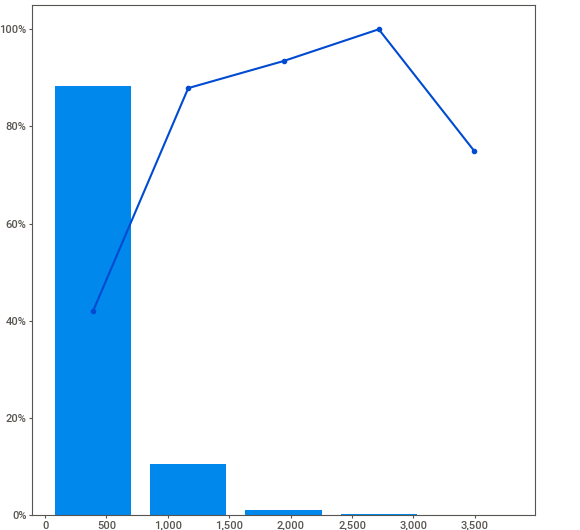
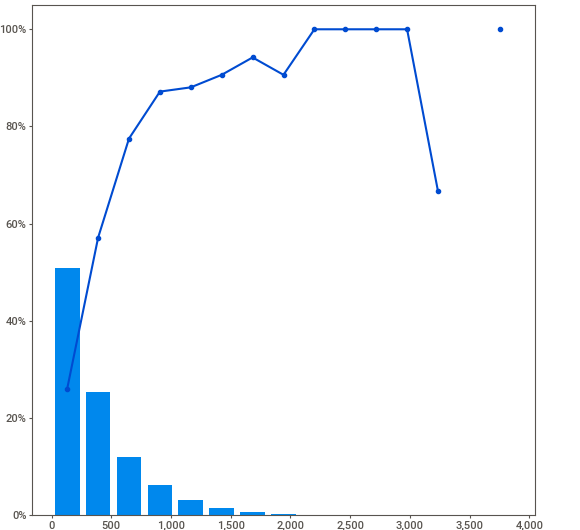
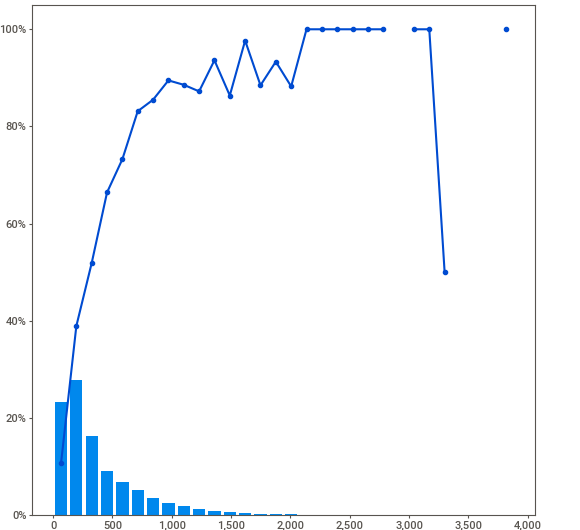
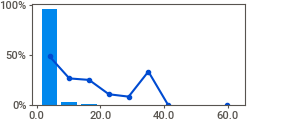
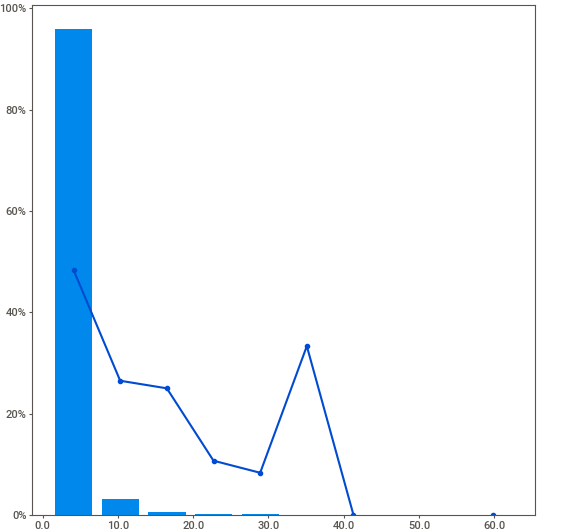
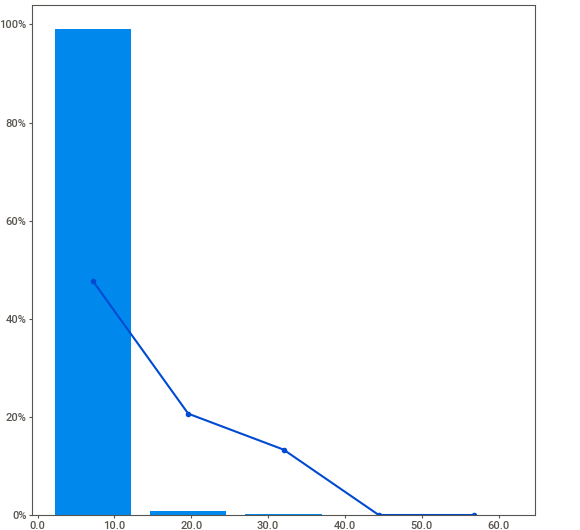
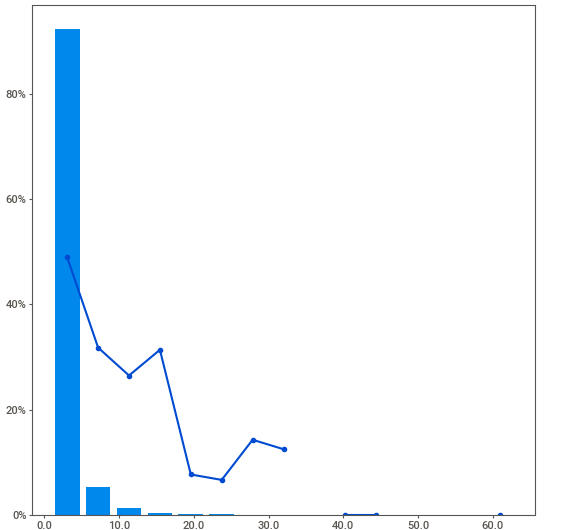
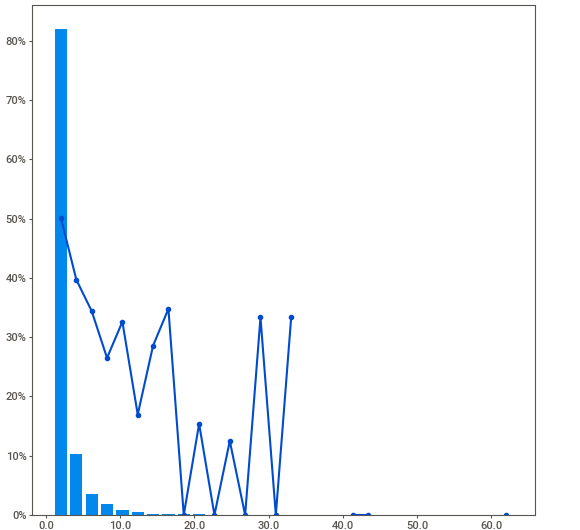
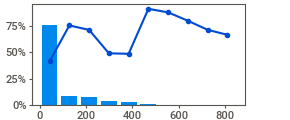
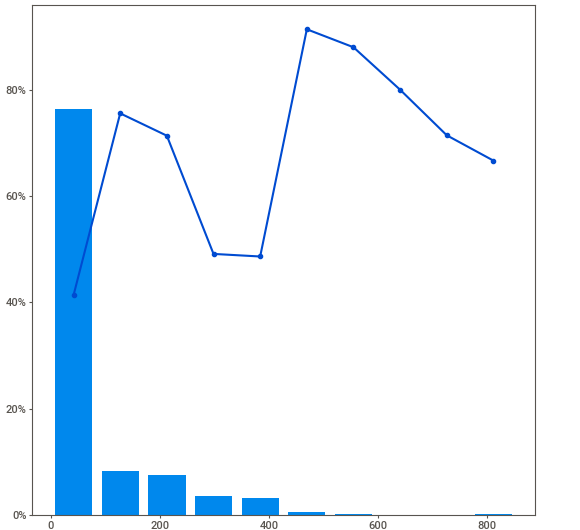
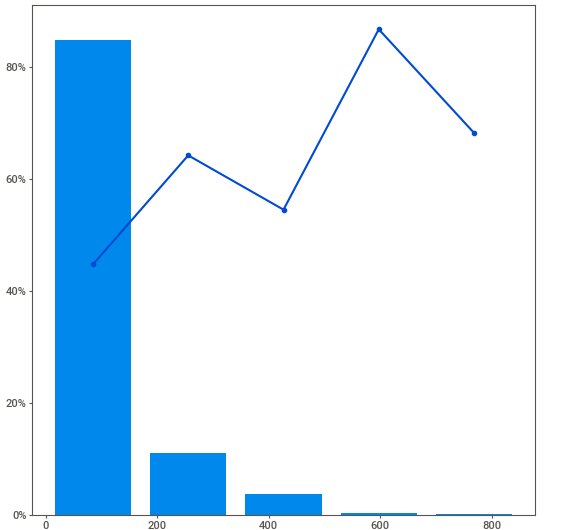
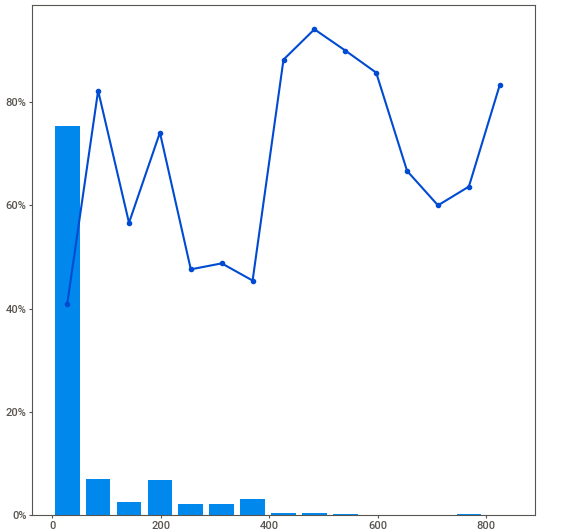
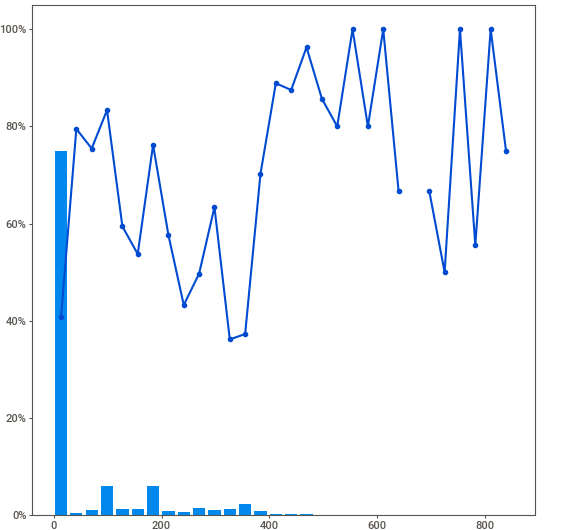
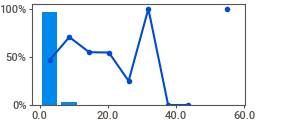
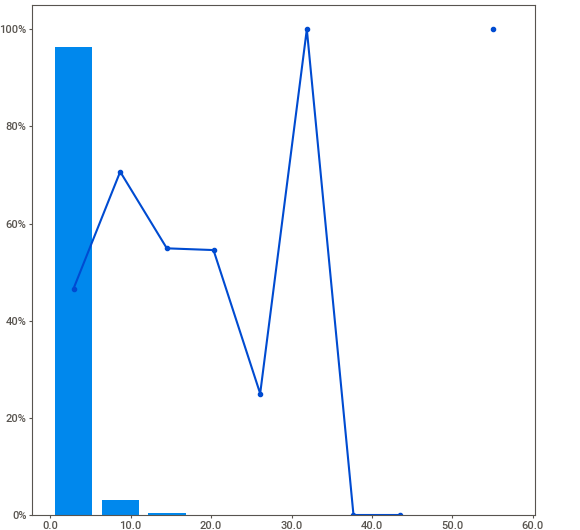
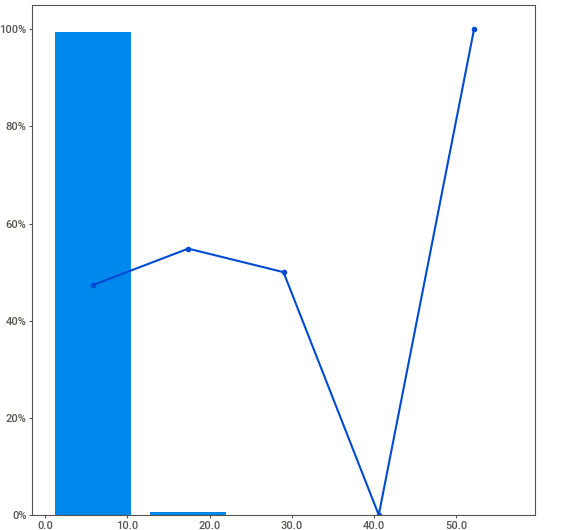
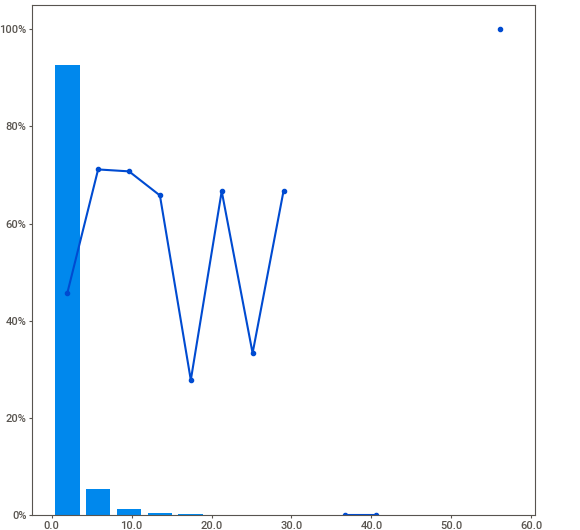
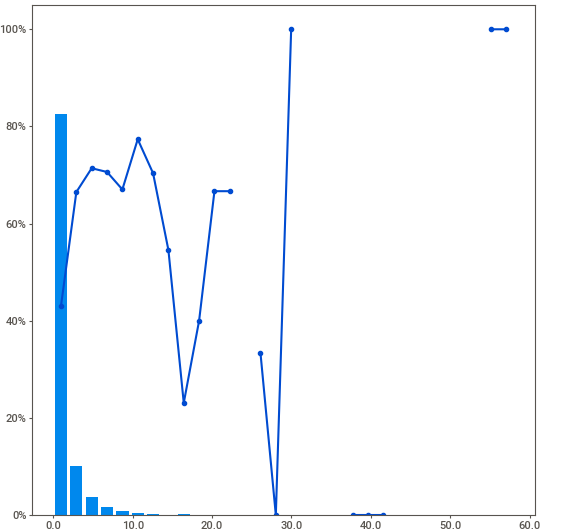
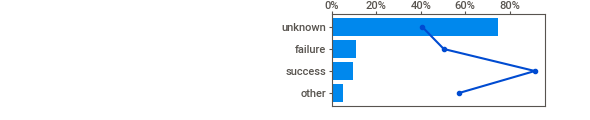
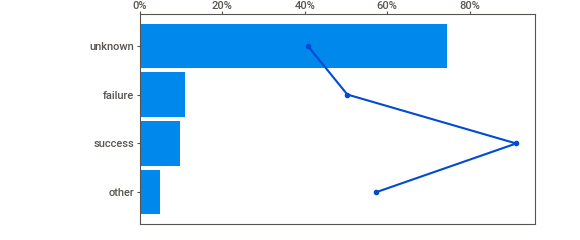
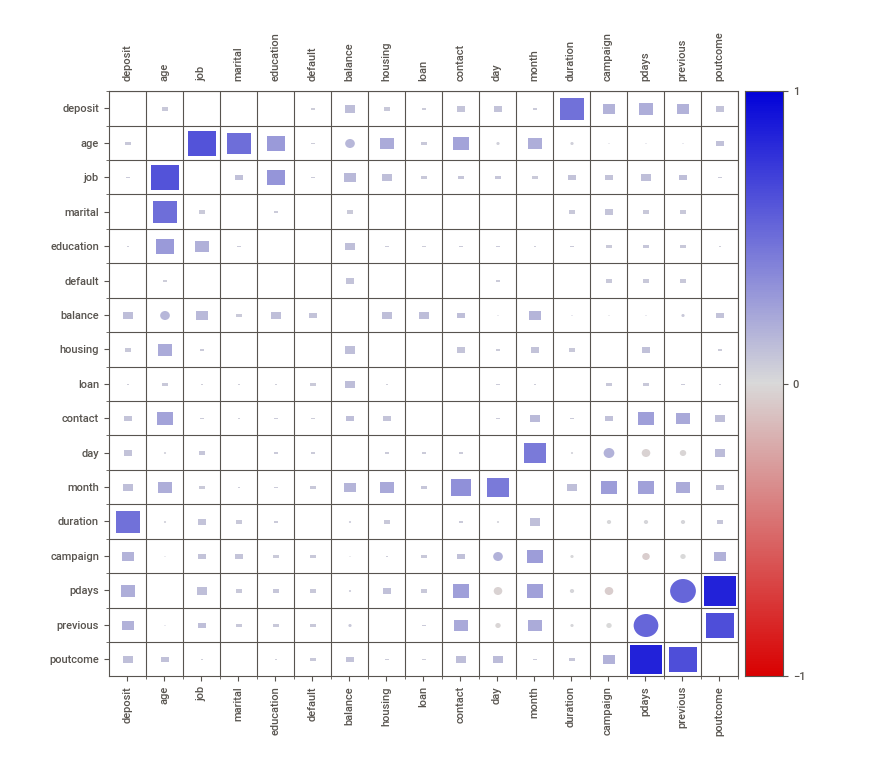
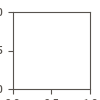

In [ ]:
report_sv.show_notebook()

## Conclusions finals

- El dataset facilitat conté informació sobre els clients d'una entitat bancaria i l'objectiu es entrenar un model ML que pugui predir si un client contractarà o no un deposit, a partir d'aquesta informació disponible dels clients (ML Supervisat)
- S'han calculat les estadistiques bàsiques del dataset i s'ha comprovat que te pocs valors nuls dintre del dataset, que s'han omplert amb valors adecuats que mantinguin les propietats del dataset.
- S'han analitzat les relacions entre variables i també entre variables i sortida. S'ha decidit eliminar la variable "duration" que introduiria errors en el model ML. No hem trobat variables amb forta correlació que suposaria informació redundant 
- Per la resta de variables s'han detectat valors desconeguts ("unknown", "other",...) però no s'ha trobat la manera de deduir-los a partir de la informació disponible.
- No s'han trobat registres duplicats que podrien esbiaxar el model ML cap als valors d'aquests registres.
- S'han identificat algunes variables amb outliers i un cop analitzades s'han deixat sense canvis o be s'han transformat els valors per tal de eliminar-los o reduir la granularitat de la informació.
- La variable de sortida està balancejada i per tant no s'han aplicat tècniques de 'subsampling' o 'oversampling'.
- El nou dataset s'ha guardat en el format CSV per les fases posteriors. 